# Check simulation with online GSE area change of float parameters vs control

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
from scipy.stats import skew
from datetime import timedelta
import cmocean
from tqdm.notebook import trange, tqdm
import pickle

In [2]:
sys.path.insert(0, "/Users/gmaze/git/github/euroargodev/VirtualFleet")
from ifremer_utilities import *
# from virtualargofleet.utilities import set_WMO, simu2index, splitonprofiles, simu2index_par

/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
import regionmask
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib import patches as mpatches
from matplotlib import path
import seaborn as sns
import argopy  # Iddle when under PulseSecure !!
from xhistogram.xarray import histogram
# pd.set_option('display.max_rows', 200)
pd.reset_option('display.max_rows')
metadata = {'Author': 'G. Maze', 'Title': '', 'Project': 'EARISE'}

In [4]:
import logging
logging.getLogger("matplotlib").setLevel(logging.ERROR)
logging.getLogger("parso").setLevel(logging.ERROR)
logging.getLogger("pyproj").setLevel(logging.ERROR)
DEBUGFORMATTER = '%(asctime)s [%(levelname)s] [%(name)s] %(filename)s:%(lineno)d: %(message)s'
logging.basicConfig(
    level=logging.DEBUG,
    format=DEBUGFORMATTER,
    datefmt='%m/%d/%Y %I:%M:%S %p',
    handlers=[logging.FileHandler("logs/misc.log", mode='w')]
)
log = logging.getLogger("nb")

In [5]:
text_kws = dict(
    bbox=dict(color="none"),
    path_effects=[pe.withStroke(linewidth=2, foreground="w")],
    color="#67000d",
    fontsize=10,
)
subplot_kw={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
            'extent': np.array([-85,5.,10,60]) + np.array([-1,+1,-1,+1])}

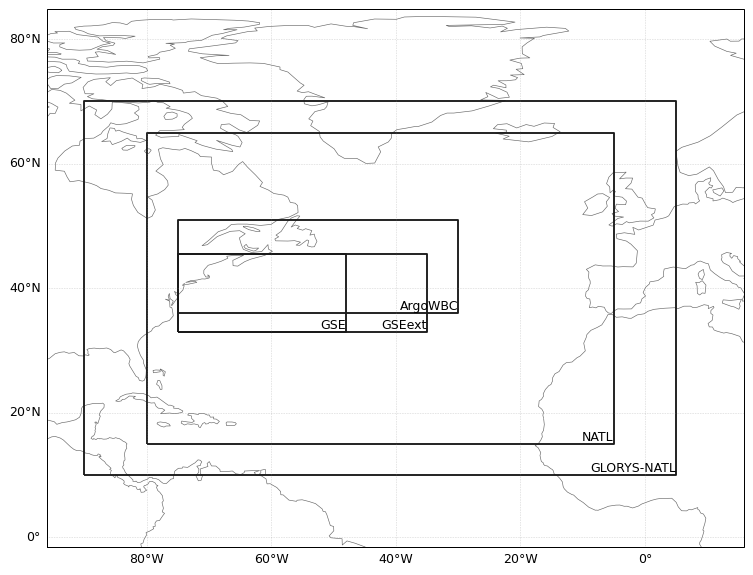

In [6]:
subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
            'extent': np.array([-95,15.,0,80]) + np.array([-1,+1,-1,+1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw2)
# regions.plot(ax=ax, add_land=False, add_ocean=False, add_label=True, label="abbrev", text_kws=text_kws)
regions.plot(ax=ax, add_land=False, add_ocean=False, add_label=False)
for r in regions:
    ax.text(r.bounds[2], r.bounds[1], r.abbrev, horizontalalignment='right', verticalalignment='bottom')
    # ax.text(r.bounds[2], r.bounds[3], r.abbrev, horizontalalignment='right', verticalalignment='top')
argopy.plot.utils.latlongrid(ax)

# Define grid resolution

In [7]:
grid_resolution = 1

# Define and load experiment to analyse

In [8]:
# ############# 
# # Cycle-period set to 5 days in GSE
# run = '614790'

# # Cycle-period set to 5 days and Parking-depth set to 1500m in GSE
# run = '1009213'

# # Parking-depth set to 1500m in GSE
# run = '653526'

# # Cycle-period set to 5 days and Parking-depth set to 500m in GSE
# run = '1132758'

# #############
# # Cycle-period set to 5 days in AST-GSE
# run = '691822'

# # Cycle-period set to 5 days and Parking-depth set to 1500m in AST-GSE
run = '1132757'

# # Parking-depth set to 1500m in AST-GSE
# run = '711242'

# #############
# # Cycle-period set to 5 days in GSE-ext
# run = '1009214'

# # Cycle-period set to 5 days and Parking-depth set to 1500m in GSE-ext
# run = '1009216'

# # Parking-depth set to 1500m in GSE-ext
# run = '1010801'

Loading Observations...
NATL
GSE
ArgoWBC
GLORYS-NATL
GSEext
Compute profile density...
Length of the observed time series: 4017 days [2008-01-01 03:25:51 - 2018-12-31 23:29:22]
Nb of profiles: 175340

Loading Control...
Load float configuration...
Load simulation...
Get index of profiles...
Loading index from file...
Found 54 weird floats, now trimming ...


  0%|          | 0/54 [00:00<?, ?it/s]

2871 profiles removed
Compute profile density...
Length of the simulation: 3640 days [2008-01-11 03:00:00 - 2017-12-29 03:00:00]
Nb of profiles: 272588



Loading Experiment...
Load float configuration...
Load simulation...
Can't find: /Users/gmaze/data/EARISE/WP2.3/Gulf_Stream_sim_scratch/simu08/vf-simu-natl-1132757.nc
Get index of profiles...
Loading index from file...
Found 23 weird floats, now trimming ...


  0%|          | 0/23 [00:00<?, ?it/s]

2745 profiles removed
Compute profile density...
Length of the simulation: 3644 days [2008-01-06 04:00:00 - 2017-12-29 03:00:00]
Nb of profiles: 292880



 Float 'flux' through each faces of the experiment domain...


  0%|          | 0/488 [00:00<?, ?it/s]

/Users/gmaze/git/github/euroargodev/VirtualFleet_GulfStream/local_work/ifremer_utilities.py:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_area'] = p.contains_points(np.array([x, y]).T)


  0%|          | 0/596 [00:00<?, ?it/s]

/Users/gmaze/git/github/euroargodev/VirtualFleet_GulfStream/local_work/ifremer_utilities.py:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_area'] = p.contains_points(np.array([x, y]).T)


  0%|          | 0/604 [00:00<?, ?it/s]

/Users/gmaze/git/github/euroargodev/VirtualFleet_GulfStream/local_work/ifremer_utilities.py:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_area'] = p.contains_points(np.array([x, y]).T)


CPU times: user 4min 18s, sys: 10.1 s, total: 4min 29s
Wall time: 4min 34s


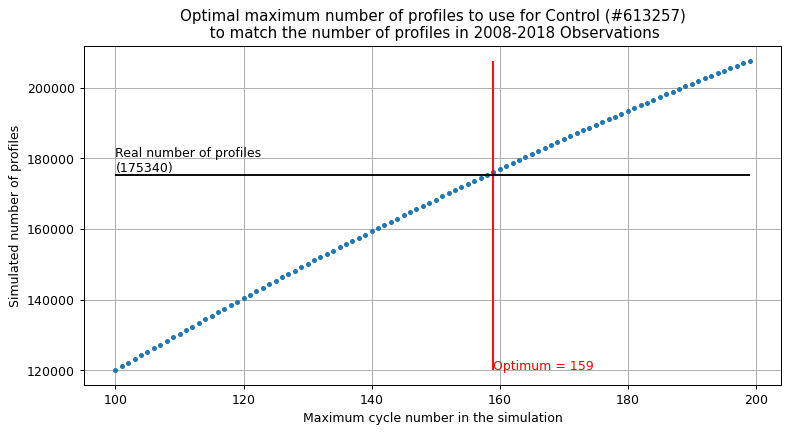

In [9]:
%%time
results = load_one_experiment_ctl_obs(run, grid_resolution=grid_resolution)
Nmax_optim = results['Nmax_optim']

# Compute the number of profiles in each of the region-masks

In [10]:
for run in ['obs', 'ctl', 'exp']:
    N_PROF = {}
    for r in regions:
        local_index = squeeze_region(regions, r.abbrev, results[run]['data']['index'])
        N_PROF[r.abbrev] = local_index.shape[0]
    results[run]['data']['N_PROF'] = N_PROF

N_PROF = {}
for r in regions:    
    N_PROF[r.abbrev] = results['exp']['data']['N_PROF'][r.abbrev] - results['ctl']['data']['N_PROF'][r.abbrev]
results['ano']['data']['N_PROF'] = N_PROF

for run in ['obs', 'ctl', 'exp', 'ano']:
    results[run]['data']['N_PROF']["NATL-non%s" % results['exp']['region']] = results[run]['data']['N_PROF']['NATL'] - results[run]['data']['N_PROF'][results['exp']['region']]

## Print profiles counts table

In [11]:
for run in ['obs', 'ctl', 'exp', 'ano']:
    print(run, results[run]['data']['N_PROF'])

obs {'NATL': 175340, 'GSE': 16636, 'ArgoWBC': 26152, 'GLORYS-NATL': 175340, 'GSEext': 24313, 'NATL-nonArgoWBC': 149188}
ctl {'NATL': 176202, 'GSE': 20894, 'ArgoWBC': 34316, 'GLORYS-NATL': 176202, 'GSEext': 31410, 'NATL-nonArgoWBC': 141886}
exp {'NATL': 182000, 'GSE': 26291, 'ArgoWBC': 48247, 'GLORYS-NATL': 182000, 'GSEext': 38265, 'NATL-nonArgoWBC': 133753}
ano {'NATL': 5798, 'GSE': 5397, 'ArgoWBC': 13931, 'GLORYS-NATL': 5798, 'GSEext': 6855, 'NATL-nonArgoWBC': -8133}


In [12]:
# Eg of markdown table:
# |       | 2008-2018 nb. of profiles |
# |-------|---------------------------|
# |Observations| 175.340 |
# |Control run| 175.960 |
# |Difference| + 620 |

keys = ['NATL', results['exp']['region'], "NATL-non%s" % results['exp']['region']]
print("|%45s|%s|" % (" ", "|".join(["%12s" % k for k in keys])))
print("|%44s:|%s:|" % ("-"*44, ":|".join(["-"*11 for k in keys])))
for run in ['obs', 'ctl', 'exp', 'ano']:        
    values = "|".join(["%12s" % results[run]['data']['N_PROF'][k] for k in keys])
    print("|%45s|%s|" % (results[run]['name'], values))
# Special ano line:
values = "|".join(["%12s" % ("(%0.1f%%)" % (results['ano']['data']['N_PROF'][k]*100/results['ctl']['data']['N_PROF'][k])) for k in keys])
print("|%45s|%s|" % (" ", values))

|                                             |        NATL|     ArgoWBC|NATL-nonArgoWBC|
|--------------------------------------------:|-----------:|-----------:|-----------:|
|                       2008-2018 Observations|      175340|       26152|      149188|
|                            Control (#613257)|      176202|       34316|      141886|
|                        Experiment (#1132757)|      182000|       48247|      133753|
|   Experiment (#1132757) vs Control (#613257)|        5798|       13931|       -8133|
|                                             |      (3.3%)|     (40.6%)|     (-5.7%)|


# Figures from grid-binned profile density (at grid_resolution)

## 1 figure per map

/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before pl

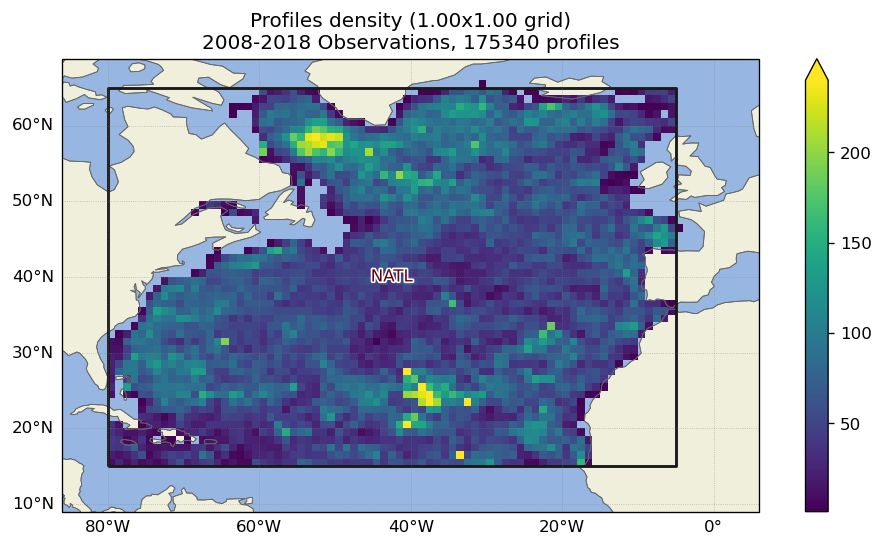

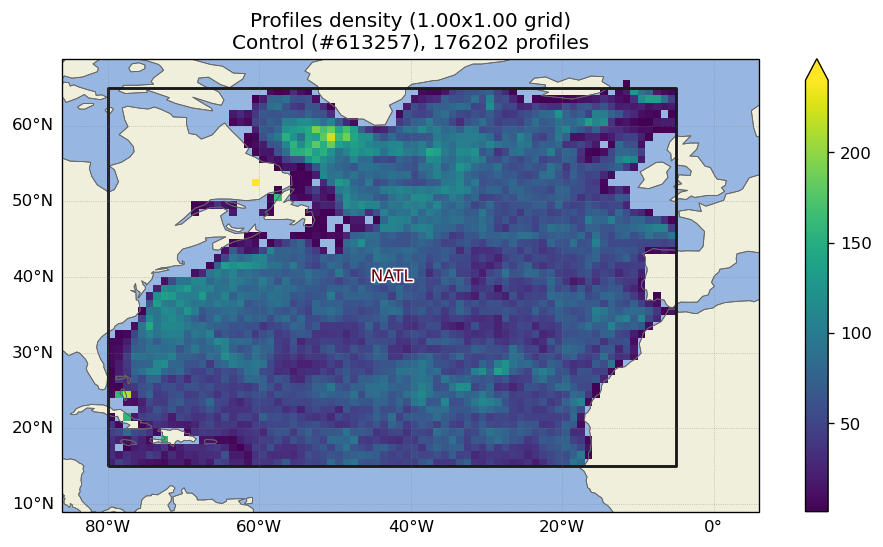

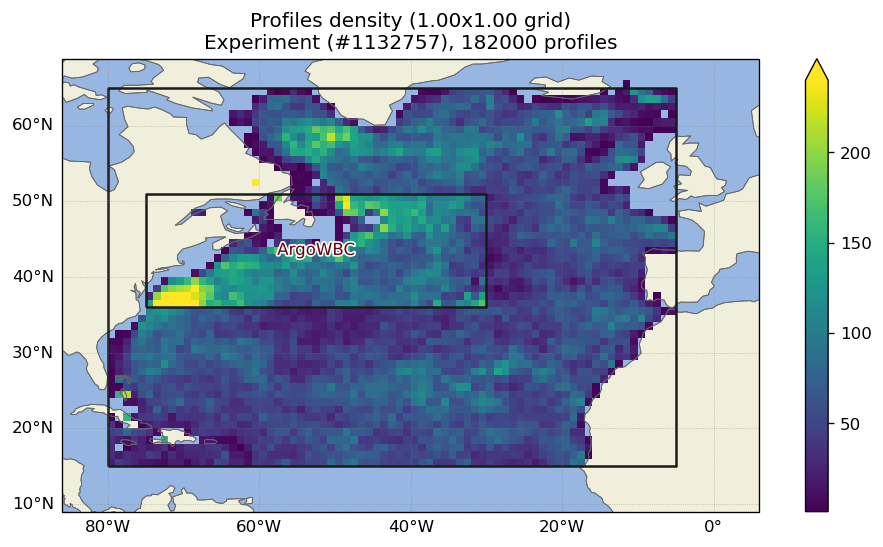

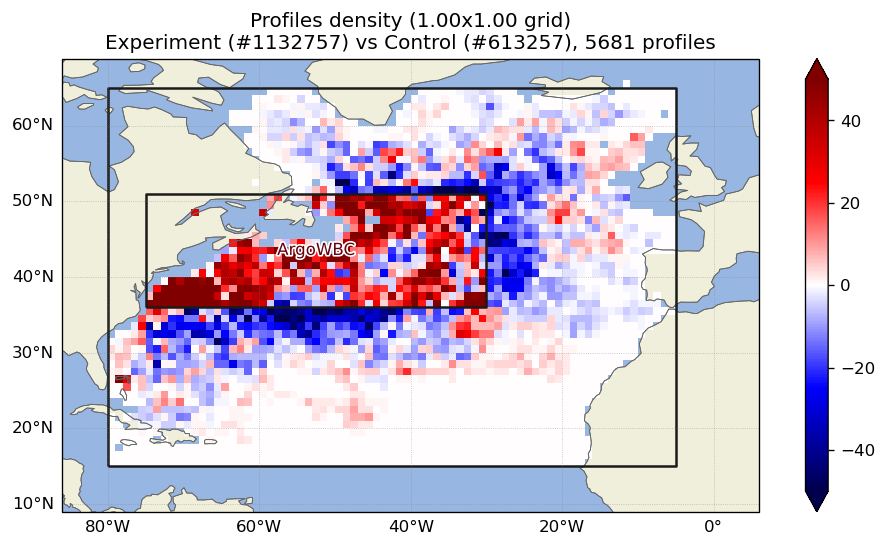

In [13]:
for ix, run in enumerate(['obs', 'ctl', 'exp', 'ano']):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

    regions.plot(regions=['NATL'], ax=ax, add_land=True, add_ocean=True, add_label=False)
    regions.plot(regions=results[run]['region'],  ax=ax, add_land=False, add_ocean=False, add_label=True, label="abbrev", text_kws=text_kws)
    argopy.plot.utils.latlongrid(ax)

    obs = results[run]['data']['prof_density']
    if run in ['obs', 'ctl', 'exp']:
        vmin, vmax = 1, 240*(grid_resolution**2)
        cmap = cmocean.cm.tempo
        cmap = plt.get_cmap('viridis')
        extend = 'max'
    else:
        vmin, vmax = -50*(grid_resolution**2), 50*(grid_resolution**2)
        cmap = cmocean.cm.balance
        cmap = plt.get_cmap('seismic')
        extend = 'both'

    cl = obs.plot(x='longitude_bin', vmin=vmin, vmax=vmax, add_colorbar=0, ax=ax, cmap=cmap)
    plt.colorbar(cl, ax=ax, extend=extend)
    ax.set_title("Profiles density (%0.2fx%0.2f grid)\n%s, %i profiles" % (grid_resolution, grid_resolution, results[run]['name'], obs.sum()))
    if run != 'obs':
        file_name = 'img/Simulation-Profile-Density-N%i-%s.png' % (Nmax_optim, results[run]['name'].replace(" ","-"))
    else:
        file_name = 'img/Simulation-Profile-Density-%s.png' % (results[run]['name'].replace(" ","-"))
    fig.savefig(file_name, bbox_inches='tight', pad_inches=0.1)

## All maps on 1 figure

/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before pl

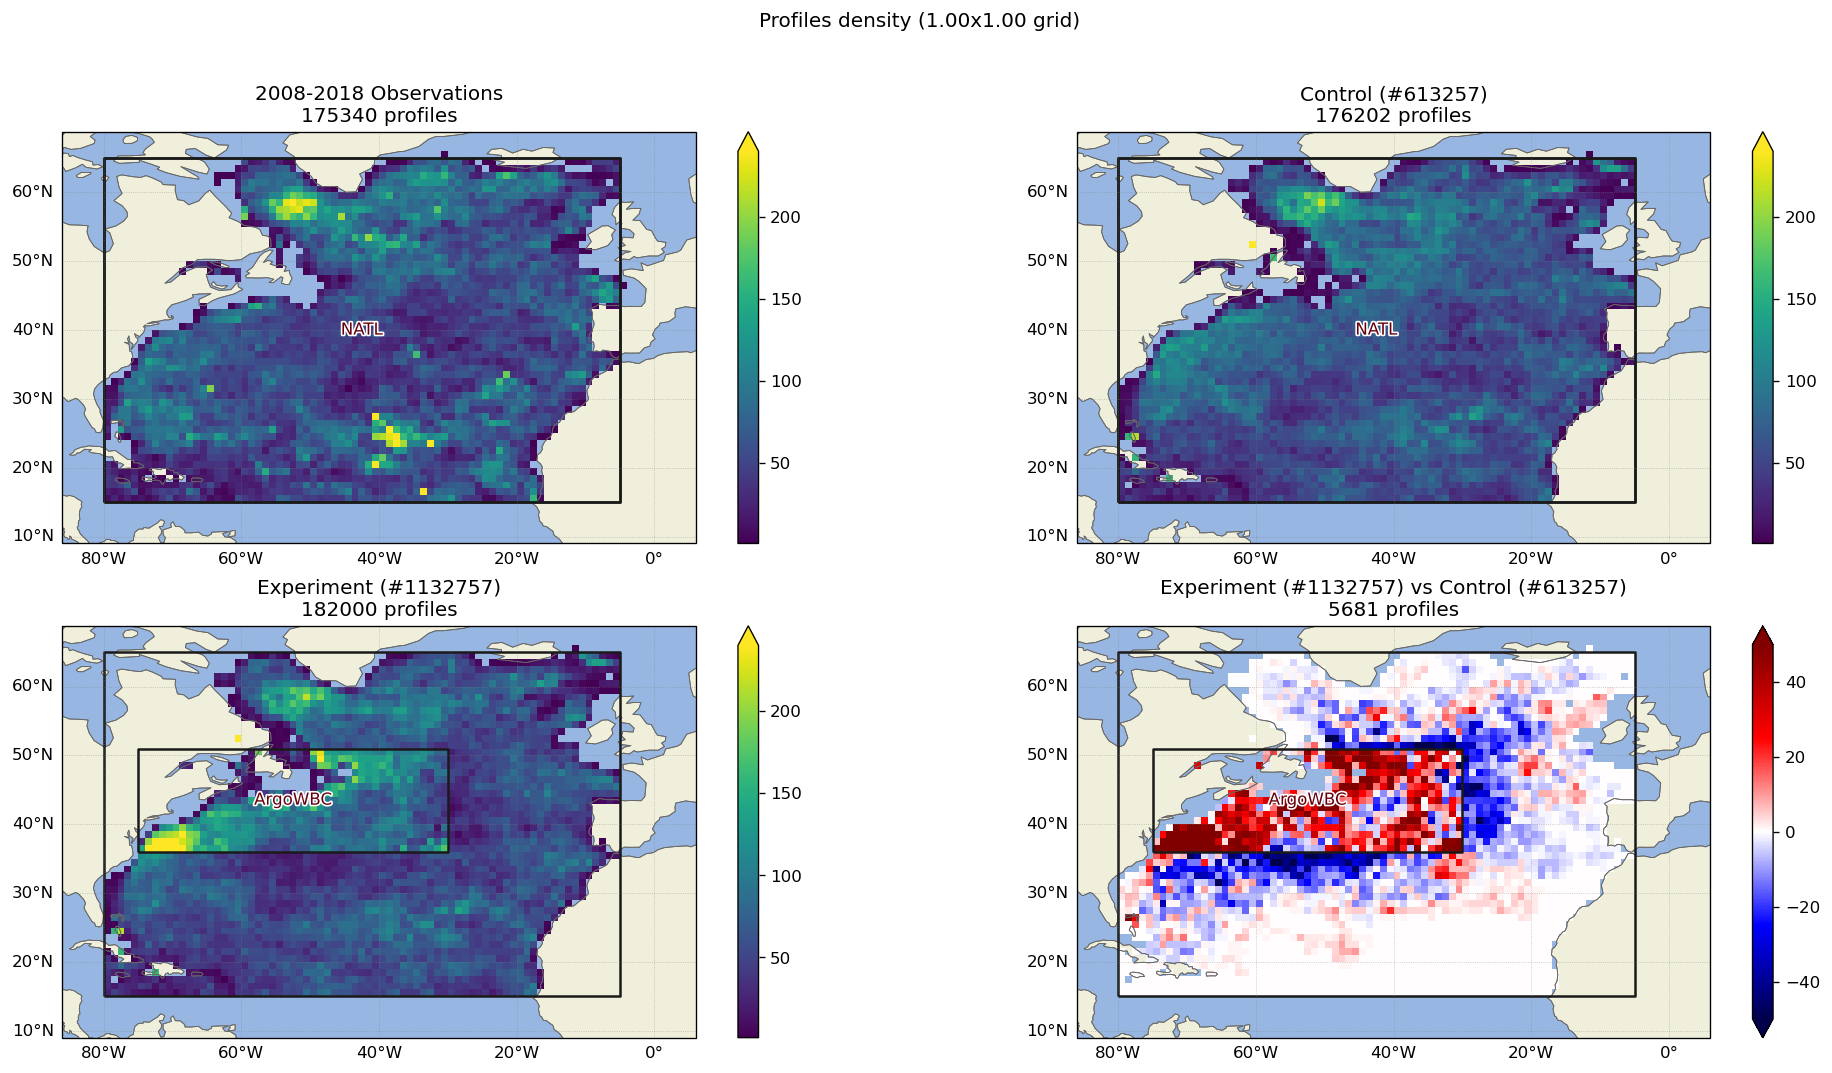

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
ax = ax.flatten()

for ix, run in enumerate(['obs', 'ctl', 'exp', 'ano']):

    regions.plot(regions=['NATL'], ax=ax[ix], add_land=True, add_ocean=True, add_label=False)
    regions.plot(regions=results[run]['region'],  ax=ax[ix], add_land=False, add_ocean=False, add_label=True, label="abbrev", text_kws=text_kws)
    argopy.plot.utils.latlongrid(ax[ix])

    obs = results[run]['data']['prof_density']
    if run in ['obs', 'ctl', 'exp']:
        vmin, vmax = 1, 240*(grid_resolution**2)
        cmap = cmocean.cm.tempo
        cmap = plt.get_cmap('viridis')
        extend = 'max'
    else:
        vmin, vmax = -50*(grid_resolution**2), 50*(grid_resolution**2)
        cmap = cmocean.cm.balance
        cmap = plt.get_cmap('seismic')
        extend = 'both'

    cl = obs.plot(x='longitude_bin', vmin=vmin, vmax=vmax, add_colorbar=0, ax=ax[ix], cmap=cmap)
    plt.colorbar(cl, ax=ax[ix], extend=extend)
    ax[ix].set_title("%s\n%i profiles" % (results[run]['name'], obs.sum()))
fig.suptitle("Profiles density (%0.2fx%0.2f grid)" % (grid_resolution, grid_resolution))
plt.savefig('img/Simulation-Profile-Density-N%i-%s-details.png' % (Nmax_optim, results['ano']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

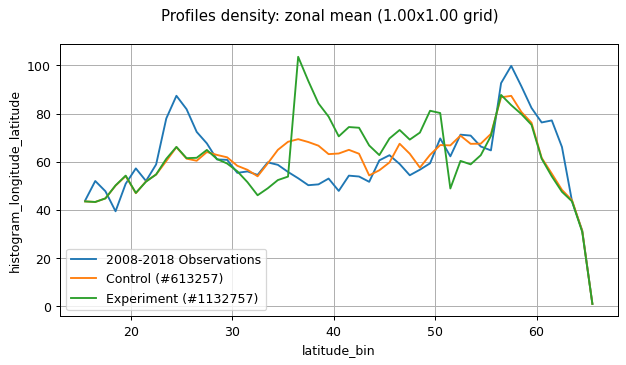

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=90, facecolor='w', edgecolor='k', sharex=True, sharey=True)

for ix, run in enumerate(['obs', 'ctl', 'exp']):
    results[run]['data']['prof_density'].mean(dim='longitude_bin').plot(ax=ax, label=results[run]['name'])
    # ax.vlines(x=regions[results[run]['region']].bounds[1], ymin=0, ymax=120)
    # ax.vlines(x=regions[results[run]['region']].bounds[3], ymin=0, ymax=120)
ax.legend()
ax.grid()
# ax.set_ylabel('')

fig.suptitle("Profiles density: zonal mean (%0.2fx%0.2f grid)" % (grid_resolution, grid_resolution))
plt.savefig('img/Simulation-Profile-Density-N%i-%s-zonal-mean.png' % (Nmax_optim, results['ano']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(


175340.0 176202.0 -424.0


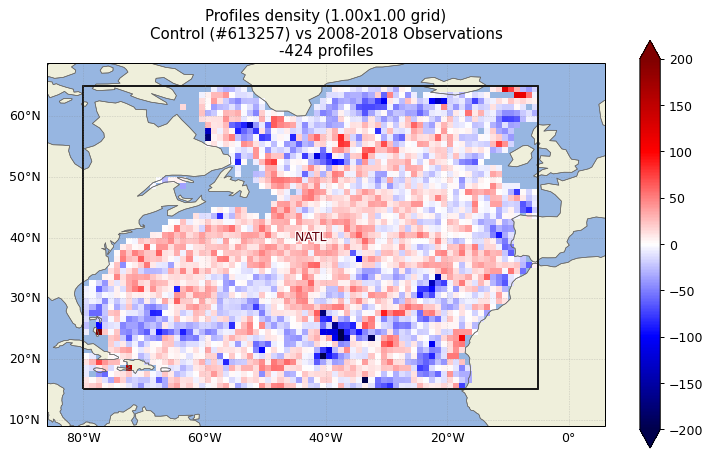

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

regions.plot(regions=['NATL'], ax=ax, add_land=True, add_ocean=True, add_label=False)
regions.plot(regions=results['ctl']['region'],  ax=ax, add_land=False, add_ocean=False, add_label=True, label="abbrev", text_kws=text_kws)
argopy.plot.utils.latlongrid(ax)

c0 = results['obs']['data']['prof_density']
c1 = results['ctl']['data']['prof_density']
fname = "%s vs %s" % (results['ctl']['name'], results['obs']['name'])
# c1 = c1/c1.sum()*c0.sum()
obs = c1-c0
print(c0.sum().values, c1.sum().values, obs.sum().values)

vmin, vmax = -200*(grid_resolution**2), 200*(grid_resolution**2)
cmap = cmocean.cm.balance
cmap = plt.get_cmap('seismic')
extend = 'both'
cl = obs.plot(x='longitude_bin', vmin=vmin, vmax=vmax, add_colorbar=0, ax=ax, cmap=cmap)
plt.colorbar(cl, ax=ax, extend=extend)
ax.set_title("Profiles density (%0.2fx%0.2f grid)\n%s\n%i profiles" % (grid_resolution, grid_resolution,fname, obs.sum()))
plt.savefig('img/Simulation-Profile-Density-N%i-%s.png' % (Nmax_optim, fname.replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:99: RuntimeWarning: 'text_kws' are passed but 'add_label' is False.
  warnings.warn(


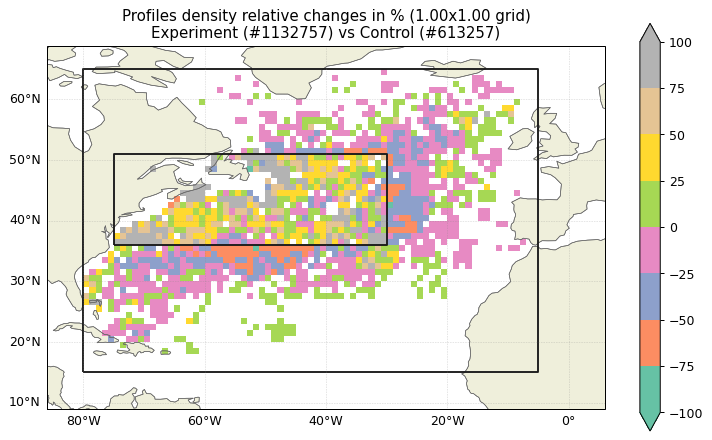

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

regions.plot(regions=['NATL'], ax=ax, add_land=True, add_ocean=False, add_label=False)
argopy.plot.utils.latlongrid(ax)
cmap = plt.get_cmap('seismic')
# cmap = plt.get_cmap('seismic', 17)
cmap = plt.get_cmap('Set2')

n0, n1 = 'ctl', 'exp'
# n0, n1 = 'obs', 'ctl'

c0 = results[n0]['data']['prof_density']
c1 = results[n1]['data']['prof_density'] - c0
fname = "%s vs %s" % (results[n1]['name'], results[n0]['name'])
c2 = (100*c1/c0)
c2 = c2.where(np.abs(c2)>=5)


# cl = (100*c1/c0).plot.contourf(x='longitude_bin', levels=np.arange(-100, 100, 16), ax=ax, vmin=-100, vmax=100, add_colorbar=0, cmap=cmap)
# cl = (100*c1/c0).plot(x='longitude_bin', ax=ax, vmin=-100, vmax=100, add_colorbar=0, cmap=cmap)
cl = c2.plot(x='longitude_bin', ax=ax, vmin=-100, vmax=100, add_colorbar=0, cmap=cmap)
plt.colorbar(cl, ax=ax, extend=extend)
regions.plot(regions=results[n1]['region'],  ax=ax, add_land=False, add_ocean=False, add_label=False, label="abbrev", text_kws=text_kws)

ax.set_title("Profiles density relative changes in %% (%0.2fx%0.2f grid)\n%s" % (grid_resolution, grid_resolution, fname))
plt.savefig('img/Simulation-Profile-Density-N%i-%s-relative.png' % (Nmax_optim, fname.replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

In [18]:
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
# ax = ax.flatten()

# for ix, run in enumerate(['ctl', 'exp', 'ano']):

#     regions.plot(ax=ax[ix], add_land=True, add_ocean=True, label="abbrev", text_kws=text_kws)
#     argopy.plot.utils.latlongrid(ax[ix])

#     obs = results[run]['data']['prof_density']
#     if run in ['ctl', 'exp']:
#         vmin, vmax = 1, 200*(grid_resolution**2)
#         cmap = cmocean.cm.tempo
#         cmap = plt.get_cmap('viridis')
#         extend = 'max'
#     else:
#         vmin, vmax = -50*(grid_resolution**2), 50*(grid_resolution**2)
#         cmap = cmocean.cm.balance
#         cmap = plt.get_cmap('seismic')
#         extend = 'both'

#     cl = obs.plot(x='longitude_bin', vmin=vmin, vmax=vmax, add_colorbar=0, ax=ax[ix], cmap=cmap)
#     plt.colorbar(cl, ax=ax[ix], extend=extend)
#     ax[ix].set_title("%s\n%i profiles" % (results[run]['name'], obs.sum()))
# fig.suptitle("Profiles density (%0.2fx%0.2f grid)" % (grid_resolution, grid_resolution))

## PDF of profiles density map

obs 57.0 1.6008771138578903
ctl 61.0 0.5506101207356091


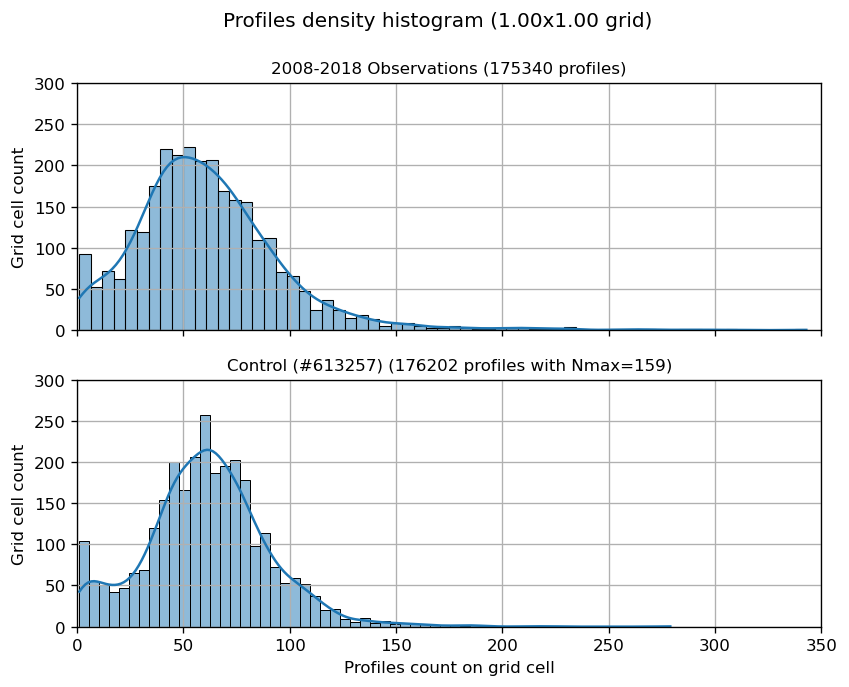

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,6), dpi=120, facecolor='w', edgecolor='k', sharex=True, sharey=True)
ax = ax.flatten()

for ix, run in enumerate(['obs', 'ctl']):

    obs = results[run]['data']['prof_density']
    val = obs.stack(sample=('longitude_bin','latitude_bin')).data
    y = val[~np.isnan(val)]
    print(run, np.median(y), skew(y))
    
    sns.histplot(y, kde=True, ax=ax[ix])
    
    ax[ix].set_xlim([0,350*(grid_resolution**2)])
    ax[ix].set_ylim([0,300])
    ax[ix].grid()
    ax[ix].set_xlabel('Profiles count on grid cell')
    ax[ix].set_ylabel('Grid cell count')
    if run != 'obs':
        title = "%s (%i profiles with Nmax=%i)" % (results[run]['name'], obs.sum(), Nmax_optim)
    else:
        title = "%s (%i profiles)" % (results[run]['name'], obs.sum())
    ax[ix].set_title(title, fontsize=10)
    # ax.set_title("Simulation profiles density distribution (1x1 grid)\n%s" % simu_name)

fig.suptitle("Profiles density histogram (%0.2fx%0.2f grid)" % (grid_resolution, grid_resolution));
plt.savefig('img/Simulation-Profile-Density-Hist-N%i-%s-details.png' % (Nmax_optim, results['ctl']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

obs 57.0 1.6008771138578903
ctl 61.0 0.5506101207356091
exp 59.0 1.7327744564342955


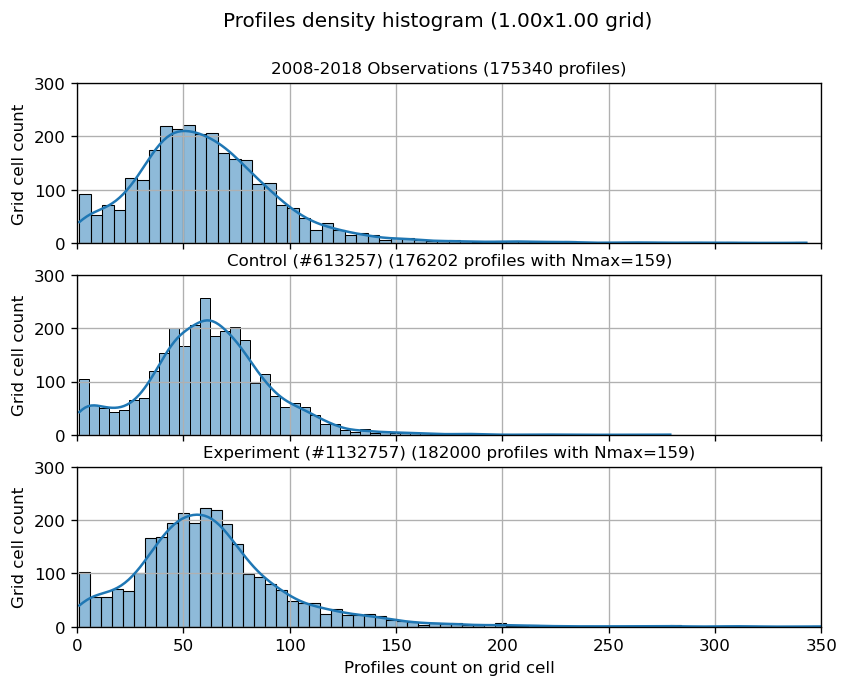

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,6), dpi=120, facecolor='w', edgecolor='k', sharex=True, sharey=True)
ax = ax.flatten()

for ix, run in enumerate(['obs', 'ctl', 'exp']):

    obs = results[run]['data']['prof_density']
    val = obs.stack(sample=('longitude_bin','latitude_bin')).data
    y = val[~np.isnan(val)]
    print(run, np.median(y), skew(y))
    
    sns.histplot(y, kde=True, ax=ax[ix])
    
    ax[ix].set_xlim([0,350*(grid_resolution**2)])
    ax[ix].set_ylim([0,300])
    ax[ix].grid()
    ax[ix].set_xlabel('Profiles count on grid cell')
    ax[ix].set_ylabel('Grid cell count')
    if run != 'obs':
        title = "%s (%i profiles with Nmax=%i)" % (results[run]['name'], obs.sum(), Nmax_optim)
    else:
        title = "%s (%i profiles)" % (results[run]['name'], obs.sum())
    ax[ix].set_title(title, fontsize=10)
    # ax.set_title("Simulation profiles density distribution (1x1 grid)\n%s" % simu_name)

fig.suptitle("Profiles density histogram (%0.2fx%0.2f grid)" % (grid_resolution, grid_resolution));
plt.savefig('img/Simulation-Profile-Density-Hist-N%i-%s-details.png' % (Nmax_optim, results['ano']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

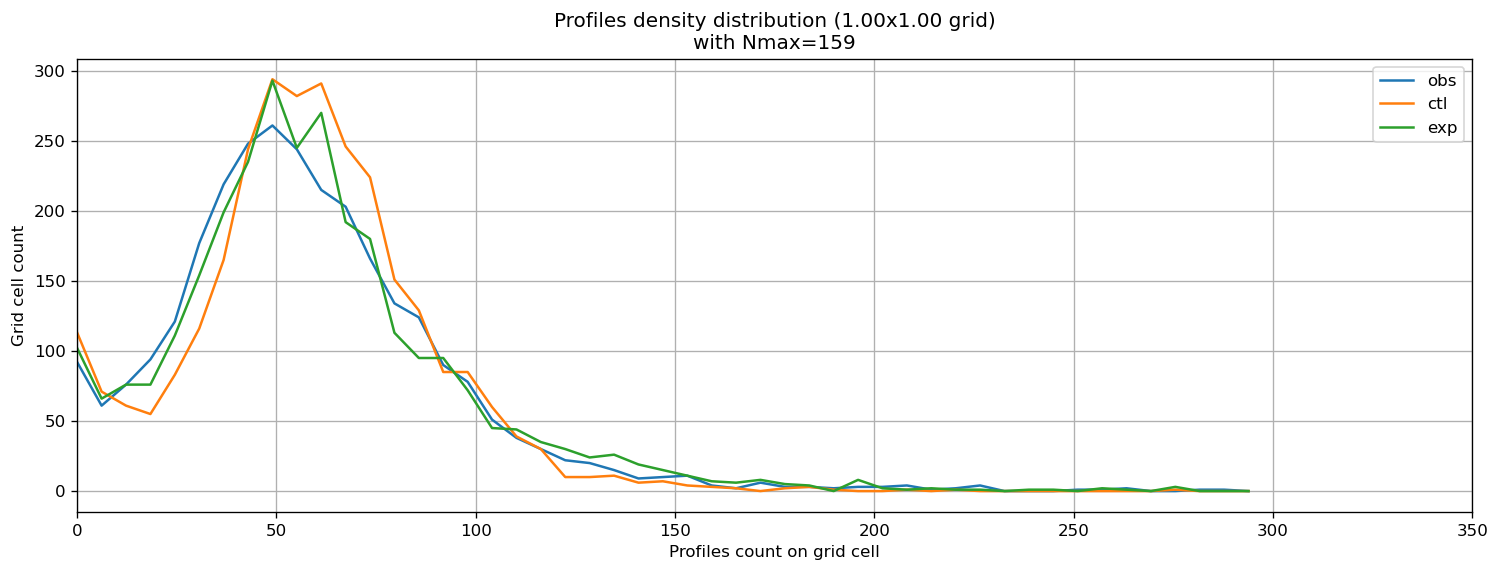

In [21]:
H = []
for ix, run in enumerate(['obs', 'ctl', 'exp']):
    obs = results[run]['data']['prof_density']
    val = obs.stack(sample=('longitude_bin','latitude_bin')).data
    h, be = np.histogram(val[~np.isnan(val)], bins=np.linspace(0, 300*(grid_resolution**2)), density=False)
    H.append(h)
df = pd.DataFrame(H, index=['obs', 'ctl', 'exp']).T
df['bins'] = be[0:-1]
df = df.set_index('bins')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=120, facecolor='w', edgecolor='k')
df.plot(ax=ax)
ax.set_xlim([0,350*(grid_resolution**2)])
# ax.set_ylim([0,300])
ax.grid()
ax.set_xlabel('Profiles count on grid cell')
ax.set_ylabel('Grid cell count')
ax.set_title("Profiles density distribution (%0.2fx%0.2f grid)\nwith Nmax=%i" % (grid_resolution, grid_resolution, Nmax_optim));

# Trajectories going throught the experiment box

In [22]:
index = results['exp']['data']['index']
local_index = squeeze_region(regions, 'GSE', index)
WMO = np.unique(local_index['wmo'])
nfloat = len(np.unique(local_index['wmo']))
mask = index.apply(lambda x: x['wmo'] in WMO, axis=1)
index = index[mask]
# index = squeeze_region(regions, 'NATL', index)
index = index.reset_index(drop=True)
index

date  latitude  longitude      wmo  cycle_number  traj_id
0     2008-01-11 04:00:00    29.328    -36.159  9000005             1        5
1     2008-01-21 04:00:00    29.169    -36.059  9000005             2        5
2     2008-01-31 04:00:00    28.857    -36.204  9000005             3        5
3     2008-02-10 04:00:00    28.517    -36.263  9000005             4        5
4     2008-02-20 04:00:00    28.432    -36.280  9000005             5        5
...                   ...       ...        ...      ...           ...      ...
47459 2017-12-21 18:00:00    43.543    -58.501  9001479             2     1479
47460 2017-12-26 18:00:00    43.593    -58.623  9001479             3     1479
47461 2017-12-17 13:00:00    43.446    -58.750  9001480             1     1480
47462 2017-12-22 13:00:00    43.193    -58.702  9001480             2     1480
47463 2017-12-27 13:00:00    42.791    -58.937  9001480             3     1480

[47464 rows x 6 columns]

/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(


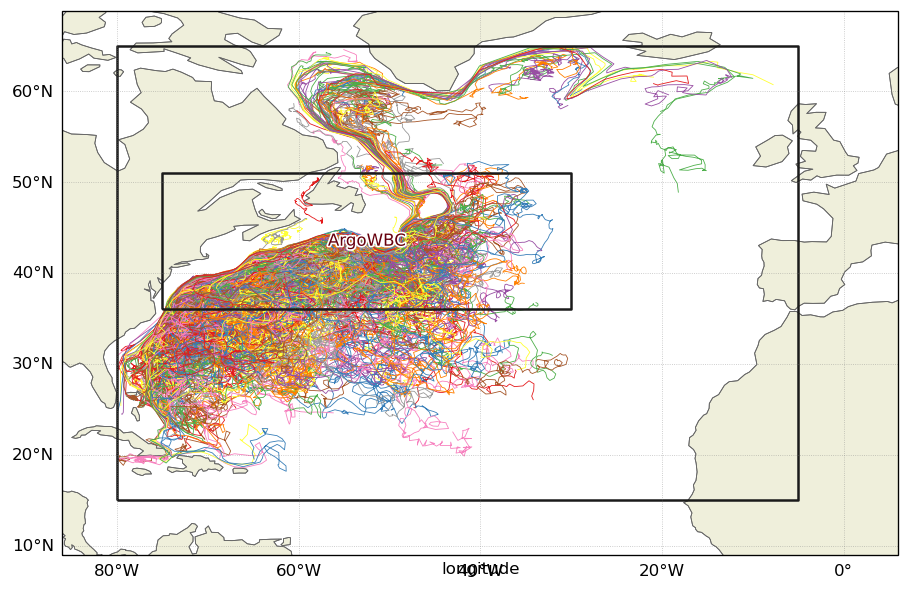

In [23]:
subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
            'extent': np.array([-95,15.,0,80]) + np.array([-1,+1,-1,+1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
mypal = argopy.plot.utils.discrete_coloring('Set1', N=nfloat).cmap

for k, [name, group] in enumerate(index.groupby("wmo")):
    group.plot.line(
        x="longitude",
        y="latitude",
        ax=ax,
        color=mypal(k),
        legend=False,
        label="_nolegend_",
        linewidth=0.5,
        xticks = [],
        yticks = [],
    )
    # group.plot.scatter(
    #     x="longitude", y="latitude", ax=ax, color=mypal(k), label=name
    # )

regions.plot(regions=['NATL'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['GLORYS-NATL'], ax=ax, add_land=True, add_ocean=False, add_label=False)
regions.plot(regions=results['ano']['region'],  ax=ax, add_land=False, add_ocean=False, add_label=True, label="abbrev", text_kws=text_kws)
argopy.plot.utils.latlongrid(ax)

In [24]:
# wmo = WMO[20]
# print(wmo)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
# index[index['wmo']==wmo].plot(x='longitude', y='latitude', ax=ax, legend=False, xticks = [], yticks = [])
# index[index['wmo']==wmo].plot.scatter(x='longitude', y='latitude', ax=ax, legend=False, c='cycle_number', cmap=plt.get_cmap('viridis'), xticks = [], yticks = [])
# regions.plot(regions=['NATL', 'GSE'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# argopy.plot.utils.latlongrid(ax)

In [25]:
# subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
#             'extent': np.array([df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()]) + np.array([-1,+1,-1,+1])}
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw2)

# df.plot(x='longitude', y='latitude', ax=ax, legend=False, color='gray', marker='.', xticks = [], yticks = [])
# ax.plot(df.iloc[0]['longitude'], df.iloc[0]['latitude'], color='green', marker='>', markersize=12, linestyle='', zorder=0.5) 
# ax.plot(df.iloc[-1]['longitude'], df.iloc[-1]['latitude'], color='k', marker='s', markersize=12, linestyle='', zorder=0.5) 
# # ax.text(df.iloc[0]['longitude'], df.iloc[0]['latitude'], 'start')
# # df.iloc[0].plot(x='longitude', y='latitude', ax=ax, legend=False, color='k', marker='s', markersize=12, linestyle='', xticks = [], yticks = [])
# # df.plot.scatter(x='longitude', y='latitude', ax=ax, legend=False, marker='.', xticks = [], yticks = [], c='cycle_number', cmap=plt.get_cmap('viridis'))
# # df[df['in_area']].plot(x='longitude', y='latitude', ax=ax, legend=False, color='k', xticks = [], yticks = [])

# df.iloc[igoes_in].plot(x='longitude', y='latitude', ax=ax, legend=False, color='r', marker='.', markersize=12, linestyle='', xticks = [], yticks = [])
# df.iloc[igoes_out].plot(x='longitude', y='latitude', ax=ax, legend=False, color='b', marker='.', markersize=12, linestyle='', xticks = [], yticks = [])

# regions.plot(regions=['NATL', 'GSE'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# argopy.plot.utils.latlongrid(ax)

# Figures with AVISO data

In [26]:
aviso = load_aviso()
aviso

<xarray.Dataset>
Dimensions:     (lon: 380, lat: 280, nv: 2, t: 11)
Coordinates:
  * lon         (lon) float64 -89.88 -89.62 -89.38 -89.12 ... 4.375 4.625 4.875
  * lat         (lat) float64 0.125 0.375 0.625 0.875 ... 69.38 69.62 69.88
  * nv          (nv) int32 0 1
  * t           (t) uint16 2000 2001 2002 2003 2004 ... 2006 2007 2008 2009 2010
Data variables: (12/15)
    lat_bnds    (lat, nv, lon) float32 0.25 0.25 0.25 0.25 ... 69.75 69.75 69.75
    lon_bnds    (lon, nv, lat) float32 270.0 270.0 270.0 270.0 ... 5.0 5.0 5.0
    crs         (lon, lat) float64 -2.147e+09 -2.147e+09 ... -2.147e+09
    mdt         (lat, lon) float64 0.5667 0.5718 0.5766 ... -0.3485 -0.3627
    u           (lat, lon) float64 -0.0641 -0.048 -0.0346 ... 0.0351 0.0298
    v           (lat, lon) float64 0.0005 0.0181 0.0336 ... -0.1171 -0.0909
    ...          ...
    speed       (lat, lon) float64 0.0641 0.0513 0.04823 ... 0.1222 0.09566
    eke         (t, lat, lon) float64 67.05 69.39 72.47 76.1 ... nan nan nan nan
    GSpos       (lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    EKEmax      (lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    EKEmax_top  (lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    EKEmax_btm  (lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/22)
    cdm_data_type:              Grid
    title:                      CNES-CLS13 MDT
    summary:                    This dataset contains global Mean Dynamic Top...
    comment:                    Surface product; Mean referenced to the [1993...
    product_version:            1.0
    institution:                CNES, CLS
    ...                         ...
    geospatial_vertical_min:    0.0
    geospatial_vertical_max:    0.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.25
    geospatial_lon_resolution:  0.25

## Simple maps of AVISO data with Experiment domains

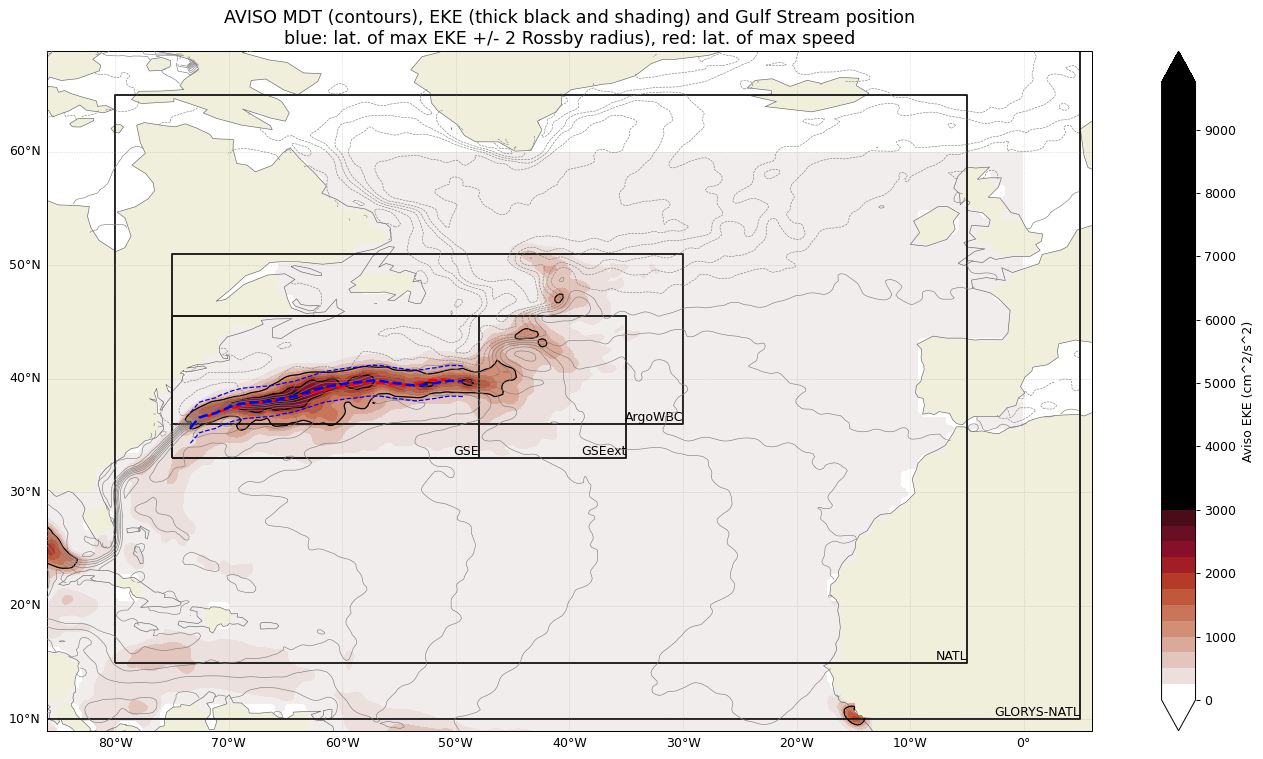

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
# ax = ax.flatten()
regions.plot(ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['NATL'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['ArgoWBC'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['GSE'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=results['exp']['region'],  ax=ax, add_land=False, add_ocean=False, add_label=True, label="abbrev", text_kws=text_kws)
for r in regions:
    # ax.text(r.bounds[2], r.bounds[3], r.abbrev, horizontalalignment='right', verticalalignment='top')
    ax.text(r.bounds[2], r.bounds[1], r.abbrev, horizontalalignment='right', verticalalignment='bottom')
    # ax.text(r.bounds[0], r.bounds[3], r.abbrev, horizontalalignment='left', verticalalignment='top')
argopy.plot.utils.latlongrid(ax, dx=10, dy=10)
    
# Altimetry climato SPEED:
# c = ax.contourf(aviso['lon'], aviso['lat'], aviso['speed'], 
#                 levels=np.arange(0,1.1,.1), extend='both', 
#                 cmap=cmocean.cm.amp, vmin=0.1, vmax=1)
# c.cmap.set_under('w')
# c.cmap.set_over('k')
# plt.colorbar(c, fraction=0.03, label='Aviso Current Speed (m/s)', extend='both', ax=ax)
# ax.contour(aviso['lon'], aviso['lat'], aviso['speed'], levels=np.arange(0,1.1,.2), colors='black', linewidths=0.5, zorder=12)

# Altimetry climato EKE:
c = plt.contourf(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
                 levels=np.arange(0,10000,250), extend='both', 
                 cmap=cmocean.cm.amp, vmin=250, vmax=3000)
c.cmap.set_under('w')
c.cmap.set_over('k')
plt.colorbar(c, fraction=0.03, label='Aviso EKE (cm^2/s^2)', extend='up', ax=ax)
ax.contour(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
           levels=np.arange(0,10000,1000), colors='black', linewidths=1, zorder=12)

ax.contour(aviso['lon'], aviso['lat'], aviso['mdt'], 
           levels=np.arange(-2,2,0.1), colors='gray', linewidths=0.5, zorder=12)

# Gulf Stream core position:
nsmooth = 6*2
aviso['GSpos'].rolling(lon=nsmooth*2, center=True).mean().plot(ax=ax, color='r', linewidth=2, zorder=13, linestyle='--')
aviso['EKEmax'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='b', linewidth=2, zorder=13, linestyle='--')
aviso['EKEmax_top'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='b', linewidth=1, zorder=13, linestyle='--')
aviso['EKEmax_btm'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='b', linewidth=1, zorder=13, linestyle='--')

ax.set_title("AVISO MDT (contours), EKE (thick black and shading) and Gulf Stream position\nblue: lat. of max EKE +/- 2 Rossby radius), red: lat. of max speed", fontsize=14)
plt.savefig('img/AVISO-EKE.png', bbox_inches='tight', pad_inches=0.1)

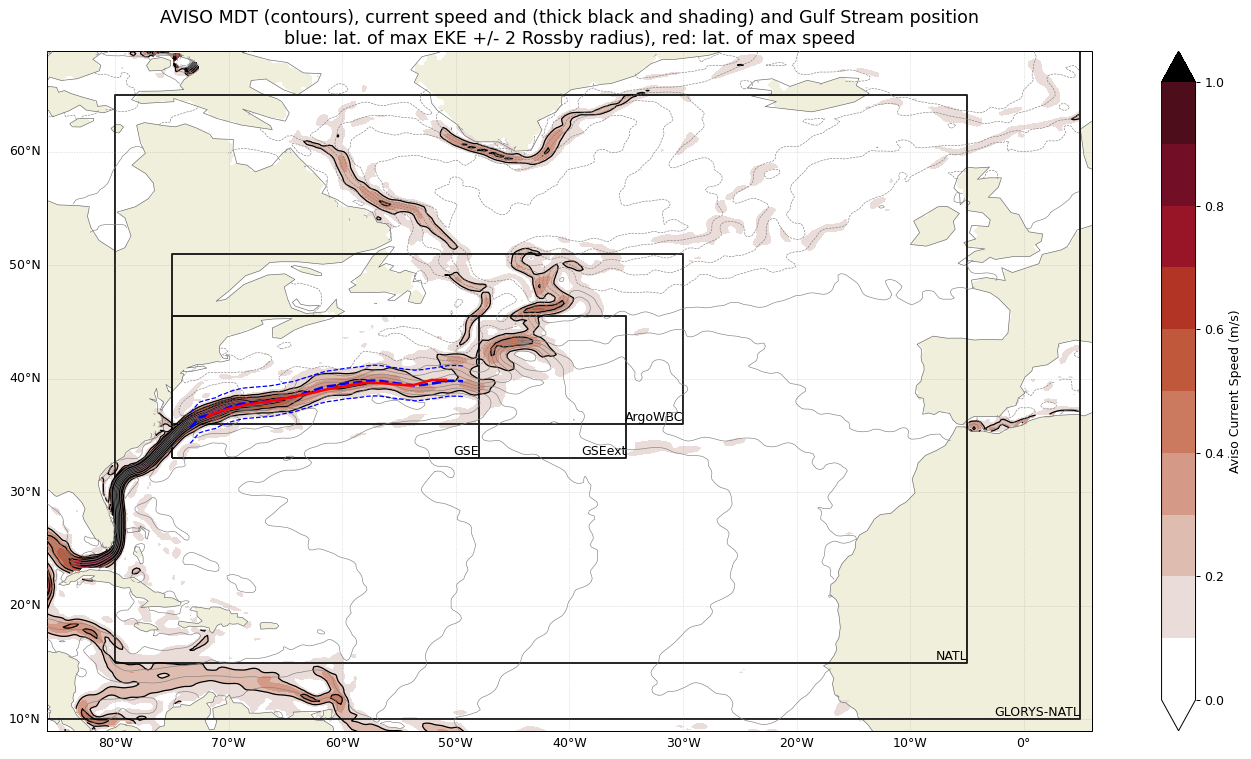

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
# ax = ax.flatten()
regions.plot(ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['NATL'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['ArgoWBC'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['GSE'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=results['exp']['region'],  ax=ax, add_land=False, add_ocean=False, add_label=True, label="abbrev", text_kws=text_kws)
for r in regions:
    # ax.text(r.bounds[2], r.bounds[3], r.abbrev, horizontalalignment='right', verticalalignment='top')
    ax.text(r.bounds[2], r.bounds[1], r.abbrev, horizontalalignment='right', verticalalignment='bottom')
    # ax.text(r.bounds[0], r.bounds[3], r.abbrev, horizontalalignment='left', verticalalignment='top')
argopy.plot.utils.latlongrid(ax, dx=10, dy=10)
    
# Altimetry climato SPEED:
c = ax.contourf(aviso['lon'], aviso['lat'], aviso['speed'], 
                levels=np.arange(0,1.1,.1), extend='both', 
                cmap=cmocean.cm.amp, vmin=0.1, vmax=1)
c.cmap.set_under('w')
c.cmap.set_over('k')
plt.colorbar(c, fraction=0.03, label='Aviso Current Speed (m/s)', extend='both', ax=ax)
ax.contour(aviso['lon'], aviso['lat'], aviso['speed'], levels=np.arange(0,1.1,.2), colors='black', linewidths=1, zorder=12)

ax.contour(aviso['lon'], aviso['lat'], aviso['mdt'], 
           levels=np.arange(-2,2,0.1), colors='gray', linewidths=0.5, zorder=12)

# Altimetry climato EKE:
# c = plt.contourf(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
#                  levels=np.arange(0,10000,250), extend='both', 
#                  cmap=cmocean.cm.amp, vmin=250, vmax=3000)
# c.cmap.set_under('w')
# c.cmap.set_over('k')
# plt.colorbar(c, fraction=0.03, label='Aviso EKE (cm^2/s^2)', extend='up', ax=ax)
# ax.contour(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
#            levels=np.arange(0,10000,1000), colors='black', linewidths=0.5, zorder=12)

# Gulf Stream core position:
nsmooth = 6*2
aviso['GSpos'].rolling(lon=nsmooth*2, center=True).mean().plot(ax=ax, color='r', linewidth=2, zorder=14, linestyle='-')
aviso['EKEmax'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='b', linewidth=2, zorder=13, linestyle='--')
aviso['EKEmax_top'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='b', linewidth=1, zorder=13, linestyle='--')
aviso['EKEmax_btm'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='b', linewidth=1, zorder=13, linestyle='--')

ax.set_title("AVISO MDT (contours), current speed and (thick black and shading) and Gulf Stream position\nblue: lat. of max EKE +/- 2 Rossby radius), red: lat. of max speed", fontsize=14)
plt.savefig('img/AVISO-SPEED.png', bbox_inches='tight', pad_inches=0.1)

## Maps of profiles density vs AVISO EKE

/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(


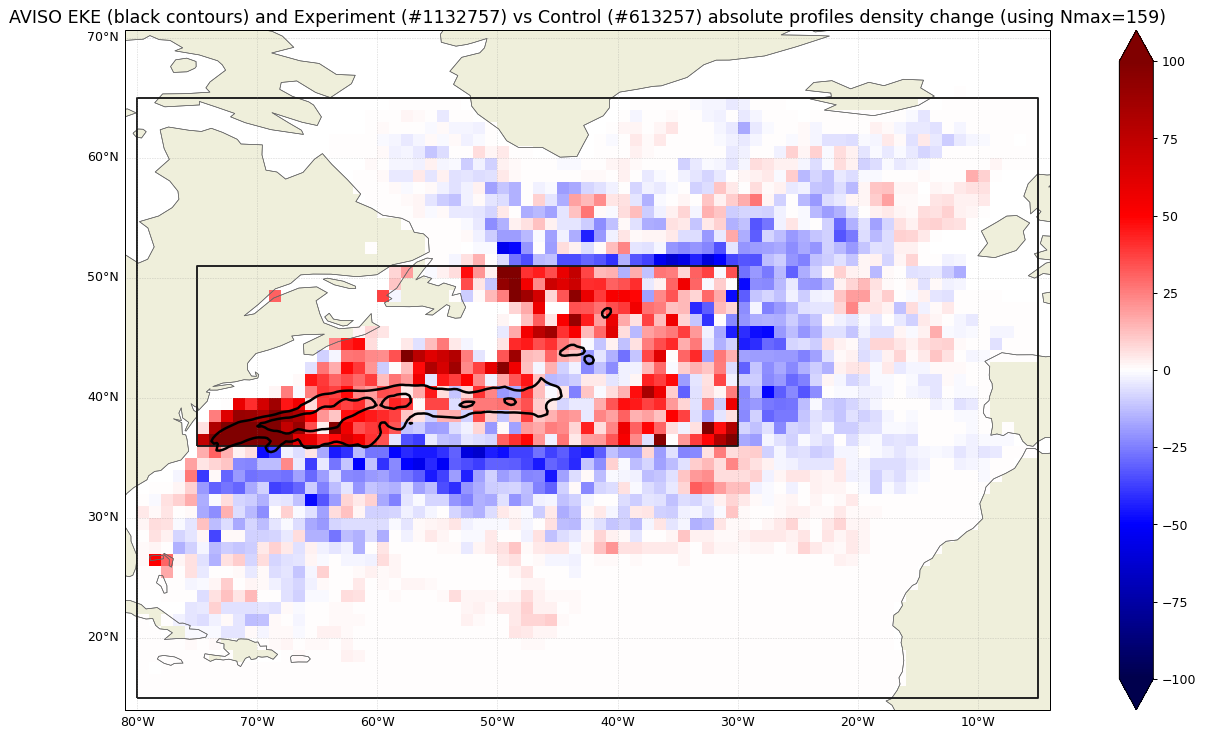

In [29]:
subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
            'extent': np.array([-80,-5.,15,65]) + np.array([-1,+1,-1,+1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw2)
# ax = ax.flatten()

regions.plot(regions=['NATL'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['ArgoWBC'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# regions.plot(regions=['GSE'], ax=ax, add_land=True, add_ocean=False, add_label=False)
regions.plot(regions=results['exp']['region'],  ax=ax, add_land=False, add_ocean=False, add_label=False)
# for r in regions:
    # ax.text(r.bounds[2], r.bounds[3], r.abbrev, horizontalalignment='right', verticalalignment='top')
    # ax.text(r.bounds[2], r.bounds[1], r.abbrev, horizontalalignment='right', verticalalignment='bottom')
    # ax.text(r.bounds[0], r.bounds[3], r.abbrev, horizontalalignment='left', verticalalignment='top')
argopy.plot.utils.latlongrid(ax, dx=10, dy=10)
    
obs = results['ano']['data']['prof_density']
v = 100
vmin, vmax = -v*(grid_resolution**2), v*(grid_resolution**2)
cmap = cmocean.cm.balance
# cmap = plt.get_cmap('PuOr_r', 9)
cmap = plt.get_cmap('seismic')
extend = 'both'
cl = obs.plot(x='longitude_bin', vmin=vmin, vmax=vmax, add_colorbar=0, ax=ax, cmap=cmap)
plt.colorbar(cl, ax=ax, extend=extend)
    
# Altimetry climato SPEED:
# c = ax.contourf(aviso['lon'], aviso['lat'], aviso['speed'], 
#                 levels=np.arange(0,1.1,.1), extend='both', 
#                 cmap=cmocean.cm.amp, vmin=0.1, vmax=1)
# c.cmap.set_under('w')
# c.cmap.set_over('k')
# plt.colorbar(c, fraction=0.03, label='Aviso Current Speed (m/s)', extend='both', ax=ax)
# ax.contour(aviso['lon'], aviso['lat'], aviso['speed'], levels=np.arange(0,1.1,.2), colors='black', linewidths=1, zorder=12)

# Altimetry climato EKE:
# c = plt.contour(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
#                  levels=np.arange(0,10000,250), extend='both', 
#                  cmap=cmocean.cm.amp, vmin=250, vmax=3000)
# c.cmap.set_under('w')
# c.cmap.set_over('k')
# plt.colorbar(c, fraction=0.03, label='Aviso EKE (cm^2/s^2)', extend='up', ax=ax)
# ax.contour(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
           # levels=np.arange(0,10000,1000), colors='black', linewidths=1, zorder=12)
ax.contour(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
           levels=np.arange(0, 3000, 1000), colors='black', linewidths=2, zorder=12)

# Gulf Stream core position:
nsmooth = 6*2
# aviso['GSpos'].rolling(lon=nsmooth*2, center=True).mean().plot(ax=ax, color='r', linewidth=2, zorder=13, linestyle='--')
# aviso['EKEmax'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='r', linewidth=3, zorder=13, linestyle='-')
# aviso['EKEmax_top'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='r', linewidth=2, zorder=13, linestyle='--')
# aviso['EKEmax_btm'].rolling(lon=nsmooth, center=True).mean().plot(ax=ax, color='r', linewidth=2, zorder=13, linestyle='--')

# title = "AVISO velocity and %s (%i profiles with Nmax=%i)" % (results['ano']['name'], obs.sum(), Nmax_optim)
title = "AVISO EKE (black contours) and %s absolute profiles density change (using Nmax=%i)" % (results['ano']['name'], Nmax_optim)
ax.set_title(title, fontsize=14)
plt.savefig('img/Simulation-Profile-Density-EKE-N%i-%s.png' % (Nmax_optim, results['ano']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

## Histogram of profiles count per bins of EKE

In [30]:
# Put aviso EKE and CONTROL profile density on the same grid:
obs = results['ctl']['data']['prof_density']
obs = obs.rename({'longitude_bin': 'lon', 'latitude_bin': 'lat'})
eke = aviso['eke'].mean(dim='t')
eke = eke.interp_like(obs)
x = obs.to_dataset(name='density')
x['eke'] = eke
x['lon'].attrs = aviso['lon'].attrs
x['lat'].attrs = aviso['lat'].attrs

# Put aviso EKE and EXPERIMENT profile density on the same grid:
obs = results['exp']['data']['prof_density']
obs = obs.rename({'longitude_bin': 'lon', 'latitude_bin': 'lat'})
eke = aviso['eke'].mean(dim='t')
eke = eke.interp_like(obs)
y = obs.to_dataset(name='density')
y['eke'] = eke

# Put aviso EKE and ANOM profile density on the same grid:
obs = results['ano']['data']['prof_density']
obs = obs.rename({'longitude_bin': 'lon', 'latitude_bin': 'lat'})
eke = aviso['eke'].mean(dim='t')
eke = eke.interp_like(obs)
z = obs.to_dataset(name='density')
z['eke'] = eke

# Mask to the EXPERIMENT region:
domain_name = results['exp']['region']
mask = np.logical_and(np.logical_and(x['lon'] >= regions[domain_name].bounds[0], x['lon'] <= regions[domain_name].bounds[2]),
                      np.logical_and(x['lat'] >= regions[domain_name].bounds[1], x['lat'] <= regions[domain_name].bounds[3]))#.astype(int)

bins_eke = np.arange(500, 3000, 100)
print(len(bins_eke))
bins_prof = np.arange(10,250,5)
print(len(bins_prof))

mask = np.logical_and(mask, x['eke']>=bins_eke[0])

# Hx, eke_edges, prof_edges = np.histogram2d(x['eke'].stack({'obs': ['lon', 'lat']}), x['density'].stack({'obs': ['lon', 'lat']}), [bins_eke, bins_prof])
# Hy, eke_edges, prof_edges = np.histogram2d(y['eke'].stack({'obs': ['lon', 'lat']}), y['density'].stack({'obs': ['lon', 'lat']}), [bins_eke, bins_prof])
Hx, eke_edges, prof_edges = np.histogram2d(x['eke'].where(mask, drop=True).stack({'obs': ['lon', 'lat']}), 
                                           x['density'].where(mask, drop=True).stack({'obs': ['lon', 'lat']}), [bins_eke, bins_prof])
Hy, eke_edges, prof_edges = np.histogram2d(y['eke'].where(mask, drop=True).stack({'obs': ['lon', 'lat']}), 
                                           y['density'].where(mask, drop=True).stack({'obs': ['lon', 'lat']}), [bins_eke, bins_prof])

Hx.shape, np.sum(Hx), np.sum(Hy)

25
48


((24, 47), 167.0, 157.0)

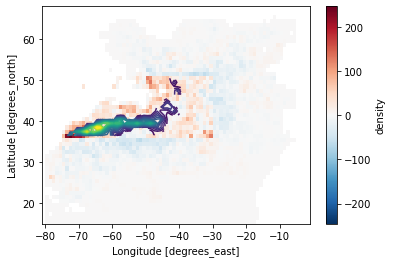

In [31]:
(y['density']-x['density']).plot(x='lon')
x['eke'].where(mask).plot.contour(levels=bins_eke)

In [32]:
data = pd.DataFrame([x['eke'].where(mask).stack({'obs': ['lon', 'lat']}).values,
                     x['density'].where(mask).stack({'obs': ['lon', 'lat']}).values, 
                     y['density'].where(mask).stack({'obs': ['lon', 'lat']}).values, 
                     z['density'].where(mask).stack({'obs': ['lon', 'lat']}).values, 
                      ], 
                    index=['eke', 'density-ctl', 'density-exp', 'density-ano']).T

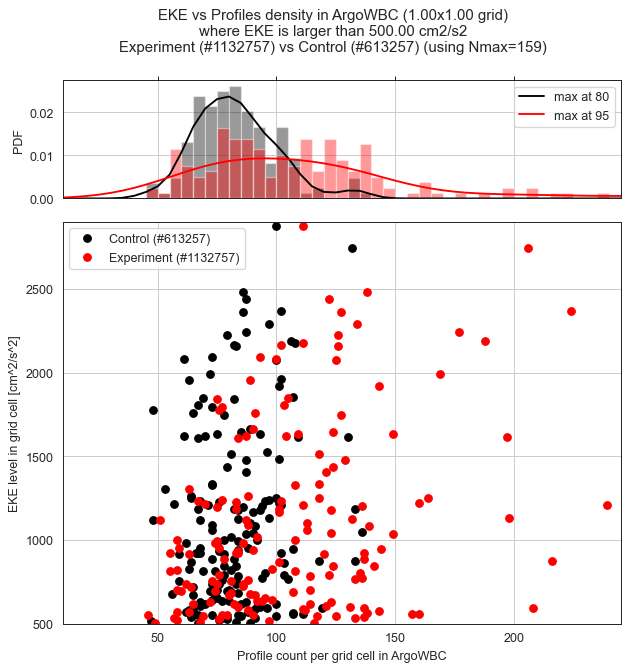

In [33]:
from matplotlib.gridspec import GridSpec
from scipy import stats
sns.set_style("white")

fig = plt.figure(figsize=(8, 8), dpi=90)
gs = GridSpec(nrows=4, ncols=3)
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_y = fig.add_subplot(gs[0, 0:3])

ax_scatter.plot(data['density-ctl'], data['eke'], 'o', c='k', markersize=6, label=results['ctl']['name'])
ax_scatter.plot(data['density-exp'], data['eke'], 'o', c='r', markersize=6, label=results['exp']['name'])
ax_scatter.set_ylabel("EKE level in grid cell [cm^2/s^2]")
ax_scatter.set_ylim(bins_eke[0], bins_eke[-1])
ax_scatter.set_xlim(bins_prof[0], bins_prof[-1])
ax_scatter.set_xlabel('Profile count per grid cell in %s' % results['exp']['region'])
ax_scatter.grid()
ax_scatter.legend()

ax_hist_y.hist(data['density-ctl'], bins=bins_prof, density=True, alpha=0.4, color='k')
ax_hist_y.hist(data['density-exp'], bins=bins_prof, density=True, alpha=0.4, color='r')
ax_hist_y.set_xticklabels([])
ax_hist_y.xaxis.tick_top()
ax_hist_y.set_xlim(bins_prof[0], bins_prof[-1])
ax_hist_y.set_ylabel('PDF')
ax_hist_y.grid()

values = data['density-ctl'].values
kernel = stats.gaussian_kde(values[~np.isnan(values)])
ax_hist_y.plot(bins_prof, kernel(bins_prof), color='k', label="max at %i" % bins_prof[np.argmax(kernel(bins_prof))])

values = data['density-exp'].values
kernel = stats.gaussian_kde(values[~np.isnan(values)])
ax_hist_y.plot(bins_prof, kernel(bins_prof), color='r', label="max at %i" % bins_prof[np.argmax(kernel(bins_prof))])
ax_hist_y.legend()

title = "EKE vs Profiles density in %s (%0.2fx%0.2f grid)\nwhere EKE is larger than %0.2f cm2/s2\n%s (using Nmax=%i)" \
        % (results['ano']['region'], grid_resolution, grid_resolution, bins_eke[0], results['ano']['name'], Nmax_optim)
fig.suptitle(title, fontsize=12);
plt.savefig('img/Simulation-Profile-Density-EKE-Hist-N%i-%s.png' \
            % (Nmax_optim, results['ano']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

Text(0.5, 0.98, 'Profiles density vs EKE in ArgoWBC\nwhere EKE is larger than 500.00\nExperiment (#1132757) vs Control (#613257) (using Nmax=159)')

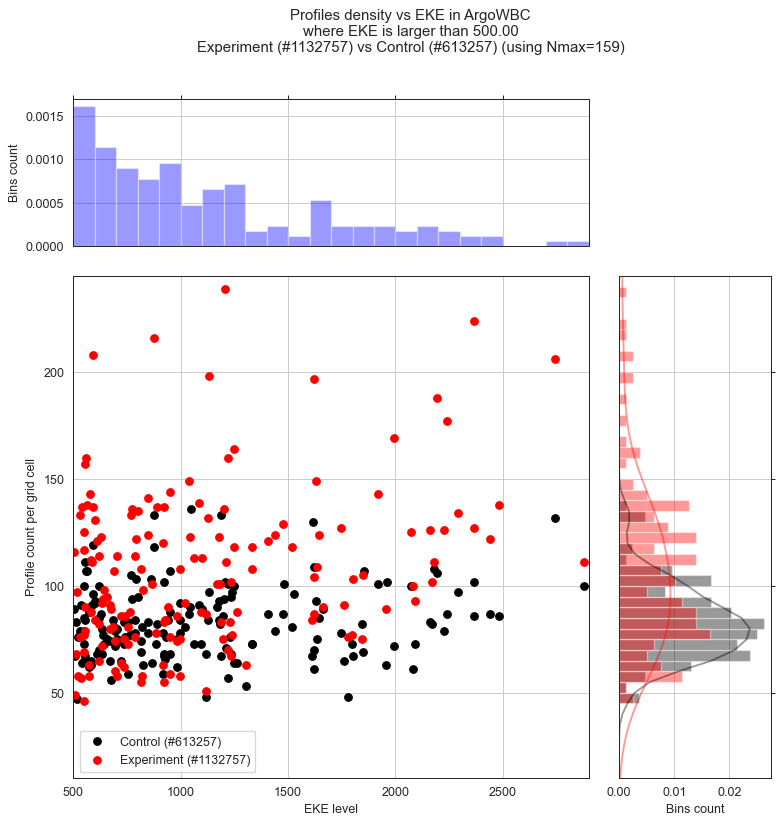

In [34]:
from matplotlib.gridspec import GridSpec
sns.set_style("white")

fig = plt.figure(figsize=(10, 10), dpi=90)
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_y = fig.add_subplot(gs[0,0:3])
ax_hist_x = fig.add_subplot(gs[1:4, 3])

ax_scatter.plot(data['eke'], data['density-ctl'], 'o', c='k', markersize=6, label=results['ctl']['name'])
ax_scatter.plot(data['eke'], data['density-exp'], 'o', c='r', markersize=6, label=results['exp']['name'])
ax_scatter.set_xlabel('EKE level')
ax_scatter.set_xlim(bins_eke[0], bins_eke[-1])
ax_scatter.set_ylim(bins_prof[0], bins_prof[-1])
ax_scatter.set_ylabel('Profile count per grid cell')
ax_scatter.grid()
ax_scatter.legend()

ax_hist_x.hist(data['density-ctl'], bins=bins_prof, orientation = 'horizontal', density=True, alpha=0.4, color='k')
ax_hist_x.hist(data['density-exp'], bins=bins_prof, orientation = 'horizontal', density=True, alpha=0.4, color='r')
ax_hist_x.set_yticklabels([])
ax_hist_x.yaxis.tick_right()
ax_hist_x.set_ylim(bins_prof[0], bins_prof[-1])
ax_hist_x.set_xlabel('Bins count')
ax_hist_x.grid()

from scipy import stats
values = data['density-ctl'].values
kernel = stats.gaussian_kde(values[~np.isnan(values)])
ax_hist_x.plot(kernel(bins_prof), bins_prof, alpha=0.4, color='k')

values = data['density-exp'].values
kernel = stats.gaussian_kde(values[~np.isnan(values)])
ax_hist_x.plot(kernel(bins_prof), bins_prof, alpha=0.4, color='r')

ax_hist_y.hist(data['eke'], bins=bins_eke, density=True, alpha=0.4, color='b')
ax_hist_y.set_xticklabels([])
ax_hist_y.xaxis.tick_top()
ax_hist_y.set_xlim(bins_eke[0], bins_eke[-1])
ax_hist_y.set_ylabel('Bins count')
ax_hist_y.grid()


title = "Profiles density vs EKE in %s\nwhere EKE is larger than %0.2f\n%s (using Nmax=%i)" \
% (results['ano']['region'], bins_eke[0], results['ano']['name'], Nmax_optim)
fig.suptitle(title, fontsize=12)

In [35]:

# Mask to the EXPERIMENT region:
domain_name = results['exp']['region']
domain_name = 'NATL'
domain_mask = np.logical_and(np.logical_and(x['lon'] >= regions[domain_name].bounds[0], x['lon'] <= regions[domain_name].bounds[2]),
                      np.logical_and(x['lat'] >= regions[domain_name].bounds[1], x['lat'] <= regions[domain_name].bounds[3]))

d_eke = 100
bins_eke = np.arange(0, 3000, d_eke)
# print(len(bins_eke))
Nx, Ny = [], []

for abin in bins_eke:
    
    mask = np.logical_and(np.logical_and(domain_mask, x['eke']>=abin), x['eke']<abin+d_eke)
    nx = x['density'].where(mask, drop=True).stack({'obs': ['lon', 'lat']}).sum().values    
    ny = y['density'].where(mask, drop=True).stack({'obs': ['lon', 'lat']}).sum().values
    # print(abin, nx, ny)
    Nx.append(nx)
    Ny.append(ny)
    
df = pd.DataFrame([Nx, Ny], index=[results['ctl']['name'], results['exp']['name']], columns=bins_eke).T
df.head()

Control (#613257) Experiment (#1132757)
0            100992.0              101825.0
100           25983.0               25005.0
200           10788.0               11635.0
300            6927.0                6420.0
400            3344.0                3594.0

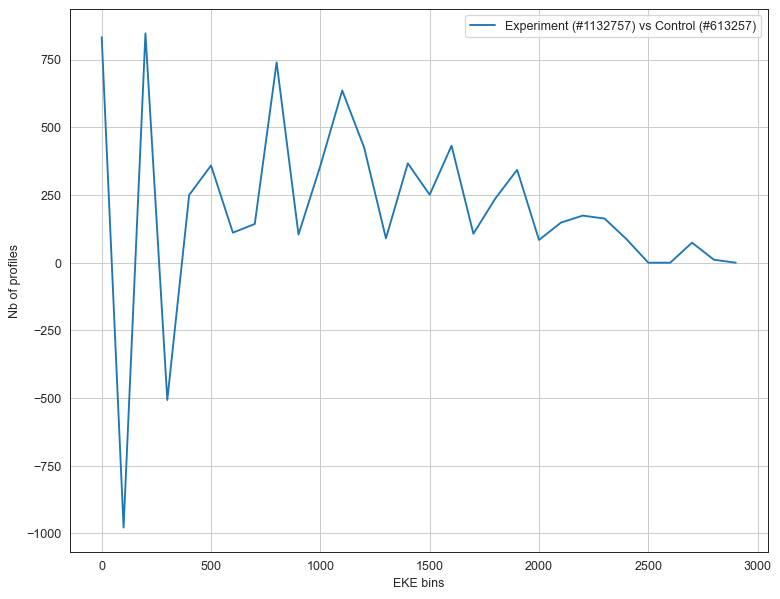

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8), dpi=90, sharex=True)
# ax = ax.flatten()
# ax.plot(df.index, df[results['ctl']['name']], label=results['ctl']['name'])
# ax.plot(df.index, df[results['exp']['name']], label=results['exp']['name'])
ax.plot(df.index, df[results['exp']['name']]-df[results['ctl']['name']], label=results['ano']['name'])
ax.set_xlabel("EKE bins")
ax.set_ylabel("Nb of profiles")
ax.legend()
ax.grid()

In [37]:
# fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,8), dpi=90, sharex=True)
# ax = ax.flatten()

# # ax[0].plot(x['density'].stack({'obs': ['lon', 'lat']}), x['eke'].stack({'obs': ['lon', 'lat']}), '.', color='k', label=results['ctl']['name'])
# # ax[0].plot(y['density'].stack({'obs': ['lon', 'lat']}), y['eke'].stack({'obs': ['lon', 'lat']}), '.', color='r', label=results['exp']['name'])
# ax[0].plot(x['density'].where(mask).stack({'obs': ['lon', 'lat']}), x['eke'].where(mask).stack({'obs': ['lon', 'lat']}), '.', color='k', label=results['ctl']['name'])
# ax[0].plot(y['density'].where(mask).stack({'obs': ['lon', 'lat']}), y['eke'].where(mask).stack({'obs': ['lon', 'lat']}), '.', color='r', label=results['exp']['name'])
# # ax[0].set_xlim([0, 250])
# # ax[0].set_ylim([0.25e3, 3e3])
# ax[0].set_ylabel('EKE values in grid cell')
# ax[0].grid()
# ax[0].legend()

# ax[1].plot(prof_edges[0:-1], np.sum(Hx,0), 'k', label=results['ctl']['name'])
# ax[1].plot(prof_edges[0:-1], np.sum(Hy,0), 'r', label=results['exp']['name'])
# # ax[1].set_xlim([0, 250])
# ax[1].set_ylabel('EKE bins count')
# ax[1].set_xlabel('Profile count per grid cell')
# ax[1].grid()

# ax[2].plot(prof_edges[0:-1], np.cumsum(np.sum(Hx,0)), 'k', label=results['ctl']['name'])
# ax[2].plot(prof_edges[0:-1], np.cumsum(np.sum(Hy,0)), 'r', label=results['exp']['name'])
# ax[2].set_ylabel('')
# ax[2].set_xlabel('Profile count per grid cell')
# ax[2].grid()

# title = "%s (%i profiles with Nmax=%i)\nProfiles density per EKE bins where EKE is larger than 500" % (results['ano']['name'], obs.sum(), Nmax_optim)
# fig.suptitle(title, fontsize=12)
# plt.savefig('img/Simulation-Profile-Density-EKE-N%i-%s.png' % (Nmax_optim, results['ano']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

In [38]:
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=90, sharey=True)
# ax = ax.flatten()

# # ax[0].plot(x['density'].stack({'obs': ['lon', 'lat']}), x['eke'].stack({'obs': ['lon', 'lat']}), '.', color='k', label=results['ctl']['name'])
# # ax[0].plot(y['density'].stack({'obs': ['lon', 'lat']}), y['eke'].stack({'obs': ['lon', 'lat']}), '.', color='r', label=results['exp']['name'])
# ax[0].plot(x['eke'].where(mask).stack({'obs': ['lon', 'lat']}), x['density'].where(mask).stack({'obs': ['lon', 'lat']}), '.', color='k', label=results['ctl']['name'])
# ax[0].plot(y['eke'].where(mask).stack({'obs': ['lon', 'lat']}), y['density'].where(mask).stack({'obs': ['lon', 'lat']}), '.', color='r', label=results['exp']['name'])
# # ax[0].set_ylim([0, 250])
# # ax[0].set_xlim([0.25e3, 3e3])
# ax[0].set_xlabel('EKE level')
# ax[0].set_ylabel('Profile count per grid cell')
# ax[0].grid()
# ax[0].legend()

# ax[1].plot(eke_edges[0:-1], np.sum(Hx,1), 'k', label=results['ctl']['name'])
# ax[1].plot(eke_edges[0:-1], np.sum(Hy,1), 'r', label=results['exp']['name'])
# # ax[1].set_ylim([0, 250])
# ax[1].set_xlabel('EKE bins count')
# # ax[1].set_ylabel('Profile count per grid cell')
# ax[1].grid()

# ax[2].plot(eke_edges[0:-1], np.cumsum(np.sum(Hx,1), 0), 'k', label=results['ctl']['name'])
# ax[2].plot(eke_edges[0:-1], np.cumsum(np.sum(Hy,1), 0), 'r', label=results['exp']['name'])
# ax[2].set_xlabel('')
# # ax[2].set_ylabel('Profile count per grid cell')
# ax[2].grid()

# title = "%s (%i profiles with Nmax=%i)\nProfiles density per EKE bins where EKE is larger than 500" % (results['ano']['name'], obs.sum(), Nmax_optim)
# fig.suptitle(title, fontsize=12)
# # plt.savefig('img/Simulation-Profile-Density-EKE-N%i-%s.png' % (Nmax_optim, results['ano']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

# Float "flux" through each faces of the experiment domain

In [39]:
# # subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
#             # 'extent': np.array([df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()]) + np.array([-1,+1,-1,+1])}
# bounds = regions['GSE'].bounds
# ex, ey = 5, 3
# subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
#         'extent': np.array([bounds[0], bounds[2], bounds[1], bounds[3]]) + np.array([-ex,+ex,-ey,+ey])}
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw2)

# run = 'exp'
# floats_flux = results[run]['data']['fluxes']['count']
# # delta = results[run]['data']['fluxes']['delta']
# delta = np.max([results[run]['data']['fluxes']['delta'] for run in ['obs', 'ctl', 'exp']])
# ms = 30
# net = 0
# for face in floats_flux.keys():
#     for direction in floats_flux[face].keys():
#         net += floats_flux[face][direction]

# make_harrow(ax, faces['east'], floats_flux['east']['in'], delta=delta, max_size=ms)
# make_harrow(ax, faces['east'], floats_flux['east']['out'], delta=delta, max_size=ms)
# make_harrow(ax, faces['west'], floats_flux['west']['in'], delta=delta, max_size=ms)
# make_harrow(ax, faces['west'], floats_flux['west']['out'], delta=delta, max_size=ms)

# make_varrow(ax, faces['south'], floats_flux['south']['in'], delta=delta, max_size=ms)
# make_varrow(ax, faces['south'], floats_flux['south']['out'], delta=delta, max_size=ms)
# make_varrow(ax, faces['north'], floats_flux['north']['in'], delta=delta, max_size=ms)
# make_varrow(ax, faces['north'], floats_flux['north']['out'], delta=delta, max_size=ms)

# regions.plot(regions=['NATL', 'GSE'], ax=ax, add_land=True, add_ocean=False, add_label=False)
# argopy.plot.utils.latlongrid(ax)

# ax.set_title("Float flux counts in: %s\nNet flux=%0.0f" % (results[run]['name'], net));
# plt.savefig('img/Simulation-Float-flux-counts-%s.png' % results[run]['name'].replace(" ","-"), bbox_inches='tight', pad_inches=0.1)

/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:385: FutureWarning: The 'regions' keyword has been deprecated. Subset regions before plotting, i.e. use `r[regions].plot()` instead of `r.plot(regions=regions)`.
  warnings.warn(
/Users/gmaze/miniconda3/envs/virtualfleet/lib/python3.8/site-packages/regionmask/core/plot.py:99: RuntimeWarning: 'text_kws' are passed but 'add_label' is False.
  warnings.warn(


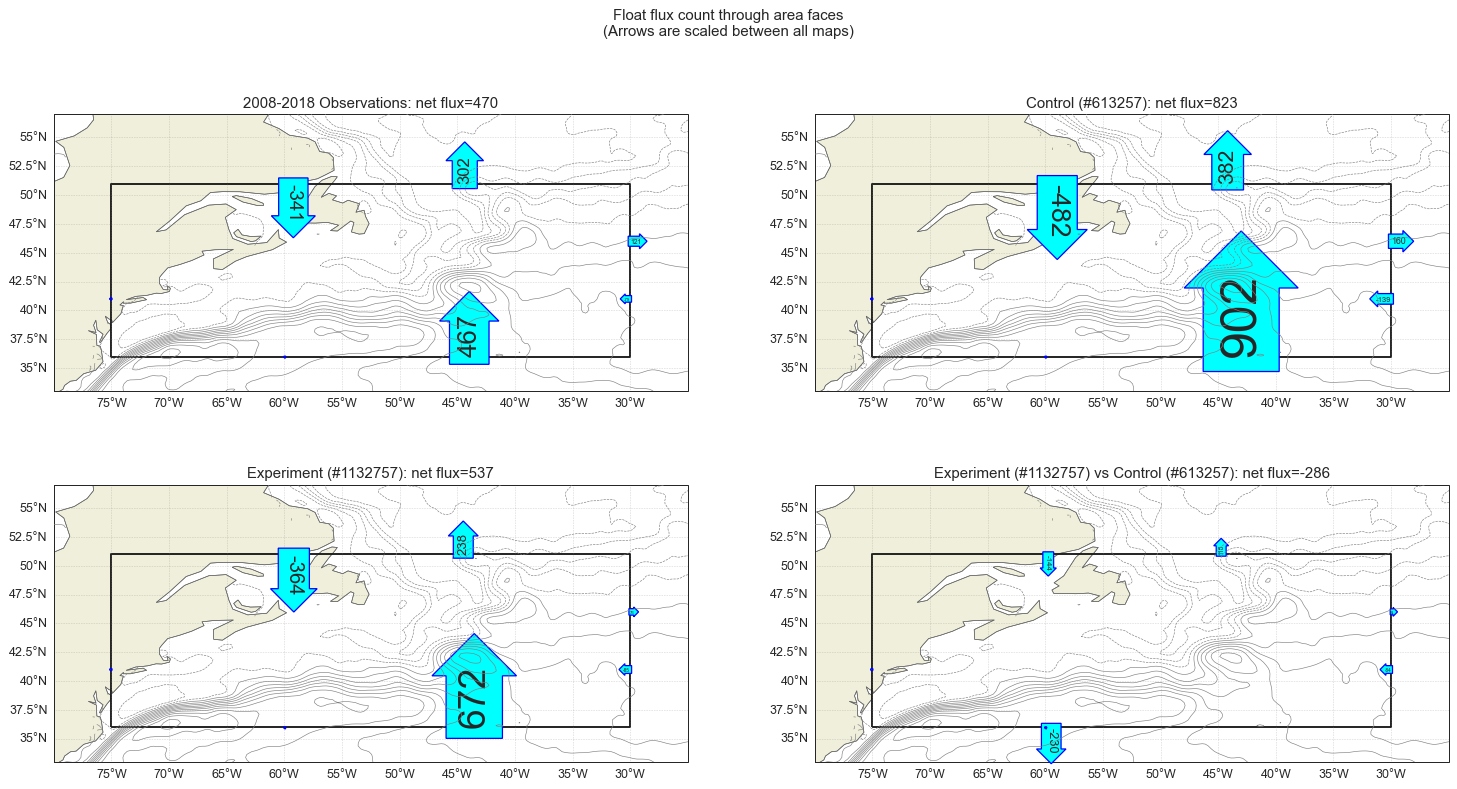

In [40]:
# subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
            # 'extent': np.array([df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()]) + np.array([-1,+1,-1,+1])}
bounds = regions[results['exp']['region']].bounds
ex, ey = 5, 3
subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
        'extent': np.array([bounds[0], bounds[2], bounds[1], bounds[3]]) + np.array([-ex,+ex,-ey,+ey])}

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw2)
ax = ax.flatten()
faces = region2segments(regions[results['exp']['region']])
to_scale = True # Use same arrow scale on all plots
# to_scale = False

for ix, run in enumerate(['obs', 'ctl', 'exp', 'ano']):

    regions.plot(regions=['NATL'], ax=ax[ix], add_land=True, add_ocean=False, add_label=False)
    regions.plot(regions=results['exp']['region'],  ax=ax[ix], add_land=False, add_ocean=False, add_label=False, label="abbrev", text_kws=text_kws)
    argopy.plot.utils.latlongrid(ax[ix], dx=5, dy=2.5)
    
    # Altimetry climato EKE:
    # c = ax[ix].contourf(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
    #                  levels=np.arange(0,10000,250), extend='both', 
    #                  cmap=cmocean.cm.amp, vmin=250, vmax=3000)
    # c.cmap.set_under('w')
    # c.cmap.set_over('k')
    # plt.colorbar(c, fraction=0.03, label='Aviso EKE (cm^2/s^2)', extend='up', ax=ax[ix])
    # ax[ix].contour(aviso['lon'], aviso['lat'], aviso['eke'].mean('t'), 
    #            levels=np.arange(0,10000,1000), colors='black', linewidths=0.5, zorder=12)

    # Altimetry MDT:
    # c = ax[ix].contourf(aviso['lon'], aviso['lat'], aviso['mdt'], 
    #                  levels=np.arange(-2,2,0.1), extend='both', 
    #                  cmap=cmocean.cm.amp, vmin=-1, vmax=1)
    # c.cmap.set_under('w')
    # c.cmap.set_over('k')
    # plt.colorbar(c, fraction=0.03, extend='up', ax=ax[ix]) # label='Aviso EKE (cm^2/s^2)', 
    ax[ix].contour(aviso['lon'], aviso['lat'], aviso['mdt'], 
               levels=np.arange(-2,2,0.1), colors='gray', linewidths=0.5, zorder=12)
    
    floats_flux = results[run]['data']['fluxes']['count']
    if to_scale == True:
        delta = 0.75*np.max([results[run]['data']['fluxes']['delta'] for run in ['obs', 'ctl', 'exp']])
    else:
        delta = 0.75*results[run]['data']['fluxes']['delta']
    ms = 30
    net = 0
    for face in floats_flux.keys():
        for direction in floats_flux[face].keys():
            net += floats_flux[face][direction]

    make_harrow(ax[ix], faces['east'], floats_flux['east']['in'], delta=delta, max_size=ms)
    make_harrow(ax[ix], faces['east'], floats_flux['east']['out'], delta=delta, max_size=ms)
    make_harrow(ax[ix], faces['west'], floats_flux['west']['in'], delta=delta, max_size=ms)
    make_harrow(ax[ix], faces['west'], floats_flux['west']['out'], delta=delta, max_size=ms)

    make_varrow(ax[ix], faces['south'], floats_flux['south']['in'], delta=delta, max_size=ms)
    make_varrow(ax[ix], faces['south'], floats_flux['south']['out'], delta=delta, max_size=ms)
    make_varrow(ax[ix], faces['north'], floats_flux['north']['in'], delta=delta, max_size=ms)
    make_varrow(ax[ix], faces['north'], floats_flux['north']['out'], delta=delta, max_size=ms)

    ax[ix].set_title("%s: net flux=%0.0f" % (results[run]['name'], net));
fig.suptitle("Float flux count through area faces\n(Arrows are %s between all maps)" % ("scaled" if to_scale else "NOT scaled"))
plt.savefig('img/Simulation-Float-flux-counts-N%i-%s-details.png' % (Nmax_optim, results['exp']['name'].replace(" ","-")), bbox_inches='tight', pad_inches=0.1)

In [41]:
stophere

NameError: name 'stophere' is not defined

# Residence time in the Experiment area

In [ ]:
# Raw estimate for an west-east transit time:
box = regions[results['exp']['region']].bounds
print(box)
# typical speed at 1000m: 0.1 m/s
# distance east-west in m: (box[2]-box[0])*111*1e3
print((box[2]-box[0])*111, "km")
print((box[2]-box[0])*111*1e3/0.1/86400, "days")

typical_time = (box[2]-box[0])*111*1e3/0.1/86400 # Days

In [ ]:
def groupby_consecutives(vals, step=1):
    """Return a list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result

def session_length(this_d):
    this_rt = []
    sessions = groupby_consecutives(this_d['cycle_number'].values)
    for session in sessions:
    #     print(session)
        last_prof = this_d.where(this_d['cycle_number']==session[-1], drop=True)['date'][0]
        frst_prof = this_d.where(this_d['cycle_number']==session[0], drop=True)['date'][0]
        dt = last_prof - frst_prof
        this_rt.append(dt.values.astype('timedelta64[D]'))
    return this_rt

In [ ]:
v = np.concatenate([np.arange(0,10), np.arange(20,30)])
groupby_consecutives(v, step=1)

run = 'ctl'
index = results[run]['data']['index']
index = squeeze_region(regions, results['exp']['region'], index)
WMOs = np.unique(index['wmo'])
data = index.to_xarray()
wmo = WMOs[0]
d = data.where(data['wmo']==wmo, drop=1)
sessions = groupby_consecutives(d['cycle_number'].values)
sessions

sl = session_length(d)
[l/np.timedelta64(1, 'D') for l in sl]

In [ ]:
Residence_time = {}

for run in ['obs', 'ctl', 'exp']:
    print(run)
    
    index = results[run]['data']['index']
    index = squeeze_region(regions, results['exp']['region'], index)
    WMOs = np.unique(index['wmo'])
    data = index.to_xarray()

    residence_times = {}
    rt = []
    for wmo in tqdm(WMOs):
        d = data.where(data['wmo']==wmo, drop=1)
        sl = session_length(d)
        v = [l/np.timedelta64(1, 'D') for l in sl]
        residence_times[wmo] = v
        # if np.any(np.array(v)>2*365):
        #     print(wmo)
        [rt.append(l/np.timedelta64(1, 'D')) for l in sl]
    
    Residence_time[run] = rt

In [ ]:
dbins = 30
bins = np.arange(0,365*3,dbins)
hist = {}
for run in ['obs', 'ctl', 'exp']:
    h, bin_edges = np.histogram(Residence_time[run], bins=bins, density=True)
    # hist[run] = h
    hist[results[run]['name']] = np.cumsum(h*dbins)
print(len(bins),len(bin_edges))

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=90, facecolor='w', edgecolor='k')
pd.DataFrame(hist, index=bins[0:-1]).plot(ax=ax)

title = 'Floats residence time over %s region\nfor %s' % (results['exp']['region'], results['ano']['name'])
ax.set_title(title, fontsize=14)
plt.savefig(os.path.join('img','ResidenceTime-N%i-%s.png' % (Nmax_optim, results['ano']['name'].replace(" ","-"))), 
            dpi=120, facecolor='w', edgecolor='w', format='png', transparent=True, bbox_inches='tight', pad_inches=0.1,
            metadata=metadata.update({'Title': title})
           )

In [ ]:
stophere

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=90, facecolor='w', edgecolor='k')
ax.flatten()

ii = 0
for run in ['obs', 'ctl', 'exp']:
    ax[ii].hist(Residence_time[run], bins=np.arange(0,365,10), density=False, label=run, alpha=0.4)
ax[ii].set_xticks(np.arange(0,365,30))
ax[ii].set_ylabel('Number of sessions')
ax[ii].set_xlabel('Residence time (days)')
# ax[ii].vlines(typical_time, 0, 250)

ii = 1
for run in ['obs', 'ctl', 'exp']:
    ax[ii].hist(Residence_time[run], bins=np.arange(0,365,10), density=True, cumulative=1, label=run, alpha=0.4)
ax[ii].hlines(0.27, 0, 10)
ax[ii].hlines(0.5, 0, 30)
ax[ii].hlines(0.8, 0, 160)
# ax[ii].vlines(typical_time, 0, 1)
ax[ii].set_xticks(np.arange(0,365,30))
# ax[ii].set_xticks(np.arange(0,2000,30*6))
ax[ii].set_ylabel('Fraction of sessions')
ax[ii].set_xlabel('Residence time (days)')

title = 'Floats residence time over %s region\nfor %s' % (results['exp']['region'], results[run]['name'])
fig.suptitle(title)

plt.savefig(os.path.join('img','GSE_ResidenceTime.png'), dpi=120, facecolor='w', edgecolor='w', format='png',
        transparent=True, metadata=metadata.update({'Title': title}))

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=90, facecolor='w', edgecolor='k')
ax.flatten()

ii = 0
# ax[ii].hist(rt, bins=np.arange(0,2000,10), density=False)
ax[ii].hist(rt, bins=np.arange(0,365,10), density=False)
ax[ii].set_xticks(np.arange(0,365,30))
ax[ii].set_ylabel('Number of sessions')
ax[ii].set_xlabel('Residence time (days)')
# ax[ii].vlines(typical_time, 0, 250)

ii = 1
# ax[ii].hist(rt, bins=np.arange(0,2000,10), density=True, cumulative=1)
ax[ii].hist(rt, bins=np.arange(0,365,10), density=True, cumulative=1)
ax[ii].hlines(0.27, 0, 10)
ax[ii].hlines(0.5, 0, 30)
ax[ii].hlines(0.8, 0, 160)
# ax[ii].vlines(typical_time, 0, 1)
ax[ii].set_xticks(np.arange(0,365,30))
# ax[ii].set_xticks(np.arange(0,2000,30*6))
ax[ii].set_ylabel('Fraction of sessions')
ax[ii].set_xlabel('Residence time (days)')

title = 'Floats residence time over %s region\nfor %s' % (results['exp']['region'], results[run]['name'])
fig.suptitle(title)

plt.savefig(os.path.join('img','GSE_ResidenceTime.png'), dpi=120, facecolor='w', edgecolor='w', format='png',
        transparent=True, metadata=metadata.update({'Title': title}))

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=90, facecolor='w', edgecolor='k')
ax.flatten()

ii = 0
# ax[ii].hist(rt, bins=np.arange(0,2000,10), density=False)
ax[ii].hist(rt, bins=np.arange(0,365,10), density=False)
ax[ii].set_xticks(np.arange(0,365,30))
ax[ii].set_ylabel('Number of sessions')
ax[ii].set_xlabel('Residence time (days)')
# ax[ii].vlines(typical_time, 0, 250)

ii = 1
# ax[ii].hist(rt, bins=np.arange(0,2000,10), density=True, cumulative=1)
ax[ii].hist(rt, bins=np.arange(0,365,10), density=True, cumulative=1)
ax[ii].hlines(0.27, 0, 10)
ax[ii].hlines(0.5, 0, 30)
ax[ii].hlines(0.8, 0, 160)
ax[ii].vlines(typical_time, 0, 1)
ax[ii].set_xticks(np.arange(0,365,30))
# ax[ii].set_xticks(np.arange(0,2000,30*6))
ax[ii].set_ylabel('Fraction of sessions')
ax[ii].set_xlabel('Residence time (days)')

title = 'Floats residence time over %s region\nfor %s' % (results['exp']['region'], results[run]['name'])
fig.suptitle(title)

plt.savefig(os.path.join('img','GSE_ResidenceTime.png'), dpi=120, facecolor='w', edgecolor='w', format='png',
        transparent=True, metadata=metadata.update({'Title': title}))

# More misc. figures

In [ ]:
stophere

In [ ]:
simu = results['exp']['data']['simu']
index = results['exp']['data']['index']

traj_id = 4

# simu['trajectory'].isel(obs=0).astype(int) == traj_id
ds = simu.sel(traj=traj_id)

df = index[index.apply(lambda x: x['traj_id'] == traj_id, axis=1)]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, facecolor='w', edgecolor='k')
plt.plot(ds['time'], ds['lon'], 'k')
plt.plot(df['date'], df['longitude'], 'r.')

In [ ]:
subplot_kw2={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
            'extent': np.array([ds['lon'].min(), ds['lon'].max(), ds['lat'].min(), ds['lat'].max()]) + np.array([-1,+1,-1,+1])}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw2)

ax.plot(ds['lon'], ds['lat'], color='k')
ds.plot.scatter(x='lon', y='lat', hue='cycle_number', marker='.', ax=ax, add_guide=False)

ax.plot(df['longitude'], df['latitude'], color='r')
df.plot.scatter(x='longitude', y='latitude', marker='s', color='r', ax=ax)

regions.plot(regions=['NATL', 'GSE'], ax=ax, add_land=True, add_ocean=False, add_label=False)
argopy.plot.utils.latlongrid(ax)

In [ ]:
np.unique(simu['traj'])

In [ ]:
# def compute_prof_density(simu_index, r=3, nanmask=True):
#     ds = simu_index.to_xarray()
#     xbins = np.arange(-81,0,r)
#     ybins = np.arange(15,69,r)
#     obs = histogram(ds['longitude'], ds['latitude'], bins=[xbins, ybins])
#     if nanmask:
#         obs = obs.where(obs>0, other=np.NaN)
#     return obs

index = results['obs']['data']['index']
# index = results['ctl']['data']['index']
index = index[np.logical_and(index['date']>='2017-01-01', index['date']<='2017-12-31')]
obs = compute_prof_density(index, r=3, nanmask=False) # annual observations on a 3x3 grid
# obs = obs/2.25

# cmap = plt.get_cmap('Spectral_r')
clist = np.array([[61, 105, 170], [121, 147, 176], [184, 197, 182], [255, 255, 186], [249, 178, 125], [235, 108, 76], [209, 46, 42]])
cmap = mpl.colors.ListedColormap(clist/255, name='ocean-ops')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

boundaries = [0, 1., 2., 3., 6., 15.]
boundaries = [0.01, 1., 2., 3., 6., 15.]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=False, extend='max')
sc = ((obs)/(12)).plot(x='longitude_bin', cmap=cmap, norm=norm, add_colorbar=False)
cl = plt.colorbar(sc, ax=ax, fraction=0.03, extend='both')

regions.plot(ax=ax, add_land=True, add_ocean=False, add_label=False, label="abbrev", text_kws=text_kws, projection=subplot_kw['projection'], 
             land_kws={'zorder':0.2, 'edgecolor': 'black', 'facecolor':'lightgray'})
argopy.plot.utils.latlongrid(ax, dx=30, dy=30)
ax.add_feature(argopy.plot.utils.land_feature, edgecolor="black")
ax.set_title("%s coverage (AST style) \n%i profiles" % ('obs', obs.sum()))

In [ ]:
index = results['obs']['data']['index']
index = results['ctl']['data']['index']

length = index['date'].max()-index['date'].min()
print("Length of the time series: %i days [%s - %s]" % (length.total_seconds()/86400, index['date'].min(), index['date'].max()))

nY, index = length.total_seconds()/86400/365, index
# nY, index = 1, index[np.logical_and(index['date']>='2017-01-01', index['date']<='2017-12-31')]

obs = compute_prof_density(index, r=3, nanmask=True) # annual observations on a 3x3 grid
Nobs_target = nY*12*2 # We expect 2 obs per month
obs = obs/Nobs_target  # mean obs per month
obs = obs*100

# cmap = plt.get_cmap('Spectral_r', lut=5)
cmap = plt.get_cmap('RdYlBu_r', lut=13)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

sc = obs.plot(x='longitude_bin', cmap=cmap, vmin=0, vmax=225, add_colorbar=False)
cl = plt.colorbar(sc, ax=ax, fraction=0.03, extend='both')
cl.set_label("% of AST target")

regions.plot(ax=ax, add_land=True, add_ocean=False, add_label=False, label="abbrev", text_kws=text_kws, projection=subplot_kw['projection'], 
             land_kws={'zorder':0.2, 'edgecolor': 'black', 'facecolor':'lightgray'})
argopy.plot.utils.latlongrid(ax, dx=30, dy=30)
ax.add_feature(argopy.plot.utils.land_feature, edgecolor="black")
ax.set_title("%s coverage\n%i profiles" % ('obs', index.shape[0]))

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=90, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

regions.plot(ax=ax, add_land=True, add_ocean=True, label="abbrev", text_kws=text_kws)
argopy.plot.utils.latlongrid(ax)

c0 = results['obs']['data']['prof_density']
c1 = results['ctl']['data']['prof_density']
c1 = c1/c1.sum()*c0.sum()
obs = c0
print(c0.sum().values, c1.sum().values, obs.sum().values)
vmin, vmax = -200*(grid_resolution**2), 200*(grid_resolution**2)
cmap = cmocean.cm.balance
cmap = plt.get_cmap('seismic')
extend = 'both'
cl = obs.plot(x='longitude_bin', vmin=vmin, vmax=vmax, add_colorbar=0, ax=ax, cmap=cmap)
plt.colorbar(cl, ax=ax, extend=extend)
ax.set_title("%s\n%i profiles" % ('simu-ctl vs obs', obs.sum()))
fig.suptitle("Profiles density (%0.2fx%0.2f grid)" % (grid_resolution, grid_resolution))

In [ ]:
from parcels import plotTrajectoriesFile
# plotTrajectoriesFile(output_file);
# plotTrajectoriesFile(output_file, mode='movie2d_notebook')
# plotTrajectoriesFile(output_file, mode='hist2d', bins=[30, 20]);

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6), dpi=100, facecolor='w', edgecolor='k', sharex=True)

simu_index = results['exp']['data']['index']
census = simu_index.set_index('date').groupby(pd.Grouper(freq='Y'))['wmo'].count()
census.plot.bar(ax=ax)
[ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)) for p in ax.patches] 
ax.set_xticklabels(census.index.year, rotation = 45)
ax.set_ylabel('Inside the area')
# ax[0].set_title('2008-2018 annual Argo floats deployment count')

fig.suptitle('Simulation annual Argo floats profile count')
plt.savefig('img/Simulation-Profile-Year.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5), dpi=120, facecolor='w', edgecolor='k')
census = simu_index.set_index('date').groupby(pd.Grouper(freq='M'))['wmo'].count()
census.plot.bar(ax=ax)
[ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)) for p in ax.patches] 
ax.set_xticklabels(["%i/%i" % (i.year, i.month) for i in census.index], rotation = 90, fontsize=6)
ax.set_title('Simulation monthly count of profiles in the domain');
# plt.savefig('Simulation-Profile-Month.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
# simu['traj']
# simu

In [ ]:
# Spagheti plot from simulation file:

# subplot_kw={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 'extent': np.array([-85,5.,10,60]) + np.array([-0.1,+0.1,-0.1,+0.1])}

subplot_kw={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
            'extent': np.array([-85,-40.,25,50]) + np.array([-1,+1,-1,+1])}

# xmin, xmax, ymin, ymax = -85.0, -20.0, 18.0, 50.0  # Velocity domain ('somovar')
# xmin, xmax, ymin, ymax = -180.0, 180.0, -90.0, 90.0  # Velocity domain ('GLORYS')
xmin, xmax, ymin, ymax = -90.0, -10.0, 10.0, 70.0  # Velocity domain ('GLORYS-NATL')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
regions.plot(ax=ax, add_land=False, add_ocean=False, label="abbrev", text_kws=text_kws)
argopy.plot.utils.latlongrid(ax)
ax.add_feature(argopy.plot.utils.land_feature)

# Velocity field area:
ax.vlines([xmin, xmax], ymin, ymax)
ax.hlines([ymin, ymax], xmin, xmax)

# cl = obs.plot(x='longitude_bin', vmin=1, vmax=200, add_colorbar=0)
# plt.colorbar(cl, ax=ax, extend='max')
# ax.set_title('2008-2018 Argo profiles density (1x1 grid)')

for i in simu['traj']:
# for i in np.random.randint(0, simu['traj'].max(), 12):
    this = simu.isel(traj=i).sortby('time')
    # this = this
    ax.plot(this['lon'][0], this['lat'][0],'k.')
    pp_virt = ax.plot(this['lon'], this['lat'], linewidth=1, label="Virtual %s" % str(this['trajectory'].values))

    wmo = this['trajectory'].values
    # this = ds_traj.where(ds_traj['wmo']==wmo, drop=1)
    # pp_real = ax.plot(this['LONGITUDE'], this['LATITUDE'], '--')
#     pp_real = ax3.plot(this['LONGITUDE'], this['LATITUDE'], '--', label="Real %s" % str(wmo))
    # plt.setp(pp_real[0], 'color', plt.getp(pp_virt[0], 'color'))

# plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
# plt.title("Virtual Fleet simulation\n(%s)" % output_file);

In [ ]:
# Spagheti plot from index file:

argopy.plot.plot_trajectory(simu_index)

In [ ]:
# Phase of cycle: init_descend = 0, drift = 1, profile_descend = 2, profile_ascend = 3, transmit = 4

trj = simu.isel(traj=0)
# trj = simu.isel(traj=nfloats-1)
# trj = simu.where(simu['PLATFORM_NUMBER']==4903260, drop=1)
# trj = simu.where(simu['PLATFORM_NUMBER']==4903051, drop=1)

cycletime = cfg.mission['cycle_duration'] * 86400  # in s

dpt = trj['z']
y = trj['cycle_age']/cycletime
x = trj['time'].values

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True)
ax = ax.flatten()

ax[0].plot(x, -dpt, 'gray', linewidth=0.5)
dc = argopy.plot.utils.discrete_coloring(name='Set1', N=5)
sc = ax[0].scatter(x, -dpt, c=trj['cycle_phase'], marker='o', cmap=dc.cmap, vmin=0, vmax=4)
# dc.cbar(ticklabels=np.arange(0,5), fraction=0.03, label='Cycle Phase')
dc.cbar(ax=ax[0], ticklabels=['0 - init_descend', '1 - drift', '2 - profile_descend', '3 - profile_ascend', '4 - transmit'], fraction=0.03, label='Cycle Phase')
ax[0].grid()
ax[0].set_ylabel('Depth [m]')
ax[0].hlines(-cfg.mission['parking_depth'], x[0], x[-1], color='gray')
ax[0].hlines(-cfg.mission['profile_depth'], x[0], x[-1], color='gray')


ax[1].plot(x, y, 'gray', linewidth=0.5)
sc = ax[1].scatter(x, y, c=trj['cycle_phase'], marker='o', cmap=dc.cmap, vmin=0, vmax=4)
dc.cbar(ax=ax[1], ticklabels=['0 - init_descend', '1 - drift', '2 - profile_descend', '3 - profile_ascend', '4 - transmit'], fraction=0.03, label='Cycle Phase')
ax[1].set_ylabel('Cycle Age [cycletime]')
ax[1].grid()

# Only display the first float cycle
# [i.set_xlim(x[0], x[int((cfg.mission['cycle_duration']+1)*86400/VFleet.run_params['record'].seconds)]) for i in ax];
# [i.set_xlim(x[0], x[int((cfg.mission['cycle_duration']+2)*86400/timedelta(seconds=3600/2).seconds)]) for i in ax];

In [ ]:
# Spagheti plot from simulation file:

# subplot_kw={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 'extent': np.array([-85,5.,10,60]) + np.array([-0.1,+0.1,-0.1,+0.1])}

subplot_kw={'projection': argopy.plot.utils.cartopy.crs.PlateCarree(), 
            'extent': np.array([-85,-40.,25,50]) + np.array([-1,+1,-1,+1])}
subplot_kw['extent'] = np.array([trj['lon'].min(),trj['lon'].max(),trj['lat'].min(),trj['lat'].max()]) + np.array([-1,+1,-1,+1])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
regions.plot(ax=ax, add_land=False, add_ocean=False, label="abbrev", text_kws=text_kws)
argopy.plot.utils.latlongrid(ax)
ax.add_feature(argopy.plot.utils.land_feature)

# Velocity field area:
ax.vlines([xmin, xmax], ymin, ymax)
ax.hlines([ymin, ymax], xmin, xmax)

# cl = obs.plot(x='longitude_bin', vmin=1, vmax=200, add_colorbar=0)
# plt.colorbar(cl, ax=ax, extend='max')
# ax.set_title('2008-2018 Argo profiles density (1x1 grid)')

ax.plot(trj['lon'][0], trj['lat'][0],'k.')
pp_virt = ax.plot(trj['lon'], trj['lat'], linewidth=1, label="Virtual %s" % str(trj['trajectory'].values))

trj_prf = simu_index[simu_index['traj_id']==int(trj['trajectory'][0])]
ax.plot(trj_prf['longitude'], trj_prf['latitude'],'r.')

# plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
# plt.title("Virtual Fleet simulation\n(%s)" % output_file);

In [ ]:
simu_index[simu_index['traj_id']==int(trj['trajectory'][0])]


In [ ]:
trj['lon']

In [ ]:
val = obs.stack(sample=('longitude_bin','latitude_bin')).data

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=120, facecolor='w', edgecolor='k')
sns.histplot(val[~np.isnan(val)], kde=True, ax=ax)
ax.set_xlim([0,350])
ax.set_ylim([0,300])
ax.set_ylabel('Profiles count')
ax.set_title('Simulation profiles density distribution (1x1 grid)')
plt.savefig('Simulation-Profile-Density-Hist.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
max_nc = ds.groupby('wmo').max()['cycle_number']
max_nc

In [ ]:
max_nc[max_nc==np.min(max_nc)]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=120, facecolor='w', edgecolor='k')
sns.histplot(max_nc[~np.isnan(max_nc)], kde=True, ax=ax, binwidth=10)
ax.set_xlim([0,500])
ax.set_ylim([0,160])
ax.set_ylabel('Floats count')
ax.set_xlabel('Max cycle number')
ax.set_title('Simulation floats maximum cycle number')
plt.savefig('Simulation-Floats-Max-Cyc-Nb.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
wmo = 1900983
# wmo = 3901637

In [ ]:
df_plan[df_plan['wmo']==wmo]

In [ ]:
simu_index[simu_index['wmo']==wmo]

In [ ]:
simu_index[simu_index['wmo']==wmo].plot(x='longitude', y='latitude')
simu_index[simu_index['wmo']==wmo].plot.scatter(x='longitude', y='latitude', c='cycle_number')